# STOCK MARKET FORECASTING WITH TRADING STRATEGY 


In [1]:
__author__ = 'RaviSheel'

### Loading the library 

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from scipy.stats import f as fisher_f


import warnings
warnings.filterwarnings('ignore')
from scipy.stats import t
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.cluster import KMeans

from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# So I have gathered the Stock dataset for this project I'm using spotify stock data sets here. You  can use any stock data you want and change accordingly in this project. Make sure you run the scripts to download stocks data. Loading SPOTIFY Weekly Return Volatility Data in the enviornment first to generally understand the dataset of this stock

### The labels are manually labelled by me by consistently watching each plot from Weekly_plots folder which I generated from STOCK_DATA_PLOT_BATCH.py file. The GREEN label here means that the stock is going up and the RED label means that the stock is going down for that particular week (There are other ways you can follow for labelling) . I'm only labelling 2 years here and I'll be training my ML models to train on the 1 year labels and test on 2 year data

In [3]:
os.chdir('D:/Master Projects/STOCKS Data')
df = pd.read_csv('SPOT_weekly_return_volatility.csv')
df

Year  Week_Number  mean_return  volatility labels
0    2018           13        -0.16        2.43  green
1    2018           14         0.17        2.47  green
2    2018           15         1.28        3.17  green
3    2018           16         0.21        1.86    red
4    2018           17        -0.67        3.84  green
..    ...          ...          ...         ...    ...
245  2022           48         0.44        3.33    NaN
246  2022           49        -0.51        2.71    NaN
247  2022           50        -0.79        4.88    NaN
248  2022           51         0.80        2.37    NaN
249  2022           52         0.41        1.95    NaN

[250 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         250 non-null    int64  
 1   Week_Number  250 non-null    int64  
 2   mean_return  250 non-null    float64
 3   volatility   250 non-null    float64
 4   labels       104 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


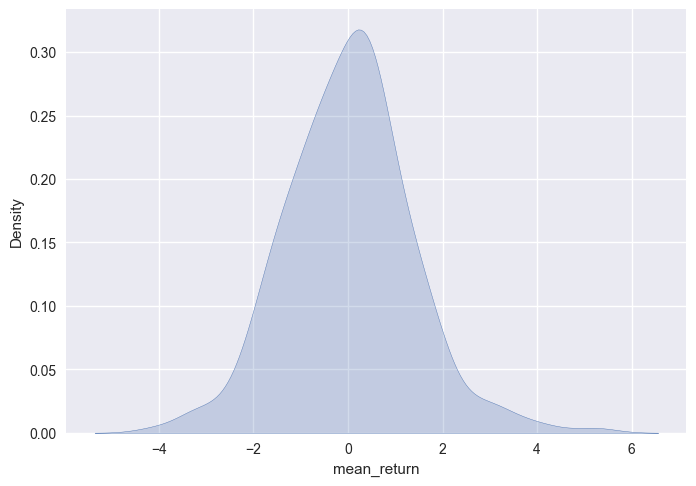

In [5]:
sns.kdeplot(df['mean_return'], fill=True)
plt.show()

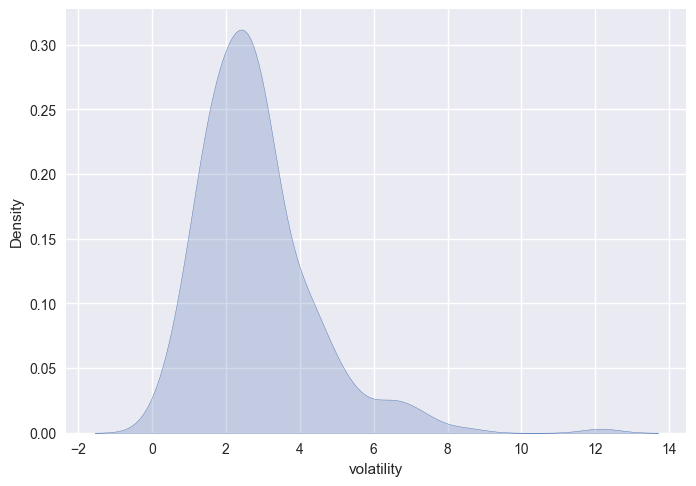

In [6]:
sns.kdeplot(df['volatility'], fill=True)
plt.show()

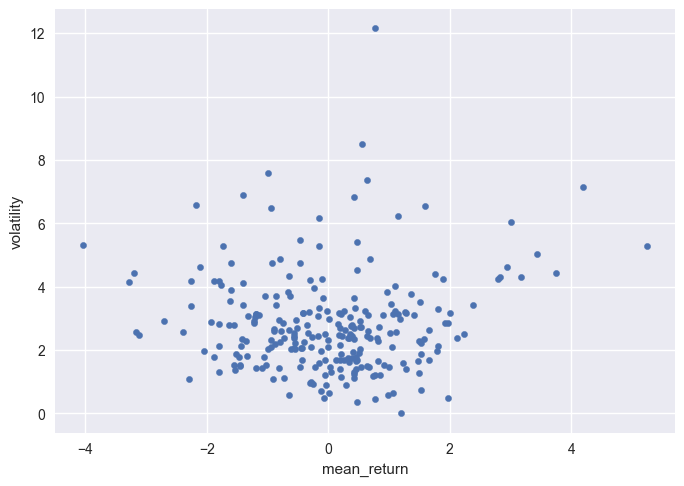

In [7]:
df.plot(kind='scatter', x='mean_return', y='volatility')
plt.show()

In [8]:
df_2018 = df[df['Year'] == 2018]  
df_2018

Year  Week_Number  mean_return  volatility labels
0   2018           13        -0.16        2.43  green
1   2018           14         0.17        2.47  green
2   2018           15         1.28        3.17  green
3   2018           16         0.21        1.86    red
4   2018           17        -0.67        3.84  green
5   2018           18         0.36        3.04    red
6   2018           19        -0.74        2.86  green
7   2018           20         0.76        1.21  green
8   2018           21         0.42        1.13  green
9   2018           22         1.50        1.28  green
10  2018           23         0.43        2.35  green
11  2018           24         0.69        2.39    red
12  2018           25        -1.40        3.42  green
13  2018           26         1.12        2.58  green
14  2018           27         1.28        1.40    red
15  2018           28        -0.47        1.47  green
16  2018           29         0.43        3.63    red
17  2018           30        -1.15        3.11  green
18  2018           31         1.52        2.21    red
19  2018           32        -0.06        1.70  green
20  2018           33         0.43        1.30    red
21  2018           34        -0.30        0.96    red
22  2018           35        -1.55        2.80  green
23  2018           36         0.33        1.77    red
24  2018           37        -0.61        2.03  green
25  2018           38         0.66        1.47    red
26  2018           39        -1.88        1.80    red
27  2018           40        -0.65        4.34    red
28  2018           41        -1.20        3.15    red
29  2018           42        -0.32        3.19    red
30  2018           43        -0.92        4.74    red
31  2018           44        -0.08        3.65    red
32  2018           45        -0.53        2.95    red
33  2018           46        -0.85        3.69  green
34  2018           47         1.10        3.25  green
35  2018           48        -0.15        3.34    red
36  2018           49        -1.46        1.51    red
37  2018           50        -3.17        2.58  green
38  2018           51         1.26        3.19  green
39  2018           52         1.20        0.00  green

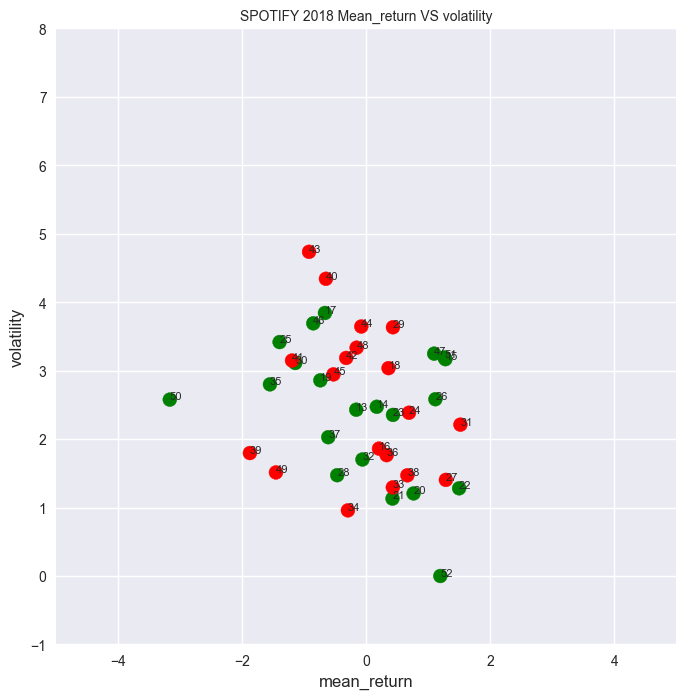

In [9]:
plt.figure(figsize =(8,8))
plt.scatter(df_2018['mean_return'], df_2018['volatility'], color = df_2018['labels'], s=100 )
plt.xlabel("mean_return", size = 12)
plt.ylabel("volatility", size = 12)
plt.title("SPOTIFY 2018 Mean_return VS volatility", size = 10)
plt . xlim (-5, 5)
plt . ylim (-1, 8)
for i, txt in enumerate(df_2018['Week_Number']):
    plt.annotate(txt, (df_2018.loc[ i ,'mean_return'], df_2018.loc[i, 'volatility']), size=8)

plt.show()

In [10]:
df_2019 = df[df['Year'] == 2019].reset_index(drop='index') 
df_2019

Year  Week_Number  mean_return  volatility labels
0   2019            0         1.59        6.54  green
1   2019            1         0.37        2.77  green
2   2019            2         2.11        2.39  green
3   2019            3         0.20        1.69    red
4   2019            4         0.39        1.74  green
5   2019            5        -0.34        2.54  green
6   2019            6         1.97        0.50    red
7   2019            7         0.45        1.42  green
8   2019            8        -1.80        1.32  green
9   2019            9         0.34        2.39    red
10  2019           10         0.27        2.63  green
11  2019           11        -0.39        2.27  green
12  2019           12         0.01        2.98  green
13  2019           13         0.34        1.63    red
14  2019           14         0.54        1.46  green
15  2019           15        -0.90        2.59    red
16  2019           16        -0.16        3.07  green
17  2019           17        -0.29        2.09    red
18  2019           18         0.26        1.69    red
19  2019           19        -0.73        2.39  green
20  2019           20        -1.22        2.92  green
21  2019           21         0.19        1.41  green
22  2019           22         2.23        2.52  green
23  2019           23         0.64        1.51  green
24  2019           24         0.53        2.03    red
25  2019           25        -0.26        2.42  green
26  2019           26         0.02        0.65  green
27  2019           27         0.82        1.65    red
28  2019           28        -1.09        1.45  green
29  2019           29         1.52        0.74    red
30  2019           30        -0.24        0.93  green
31  2019           31         0.22        2.43    red
32  2019           32        -0.93        2.31    red
33  2019           33        -1.34        1.81    red
34  2019           34        -0.43        2.05  green
35  2019           35         0.21        1.15    red
36  2019           36        -0.79        2.24    red
37  2019           37        -1.56        1.52    red
38  2019           38        -1.42        2.35    red
39  2019           39         0.74        1.17  green
40  2019           40        -0.15        1.61    red
41  2019           41        -0.01        2.09    red
42  2019           42         0.92        1.53  green
43  2019           43         4.20        7.14  green
44  2019           44         0.16        2.82  green
45  2019           45        -0.04        0.91    red
46  2019           46        -0.89        2.68    red
47  2019           47         0.30        0.91  green
48  2019           48         0.77        0.47  green
49  2019           49        -0.12        0.72    red
50  2019           50         0.42        1.25  green
51  2019           51         0.47        0.35  green
52  2019           52        -1.18        1.43    red

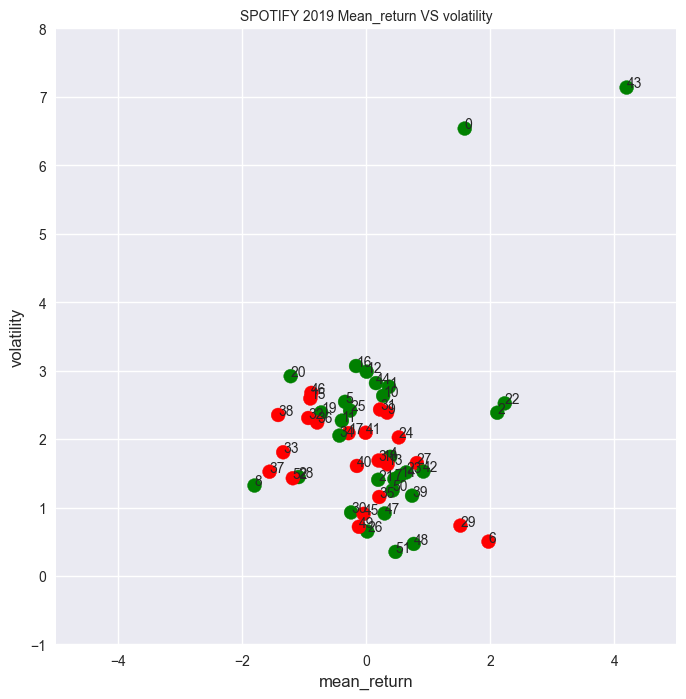

In [11]:
plt.figure(figsize =(8,8))
plt.scatter(df_2019['mean_return'], df_2019['volatility'], color = df_2019['labels'], s=100 )
plt.xlabel("mean_return", size = 12)
plt.ylabel("volatility", size = 12)
plt.title("SPOTIFY 2019 Mean_return VS volatility", size = 10)
plt . xlim (-5, 5)
plt . ylim (-1, 8)
for j, txt1 in enumerate(df_2019['Week_Number']):
    plt.annotate(txt1, (df_2019.loc[j ,'mean_return'], df_2019.loc[j, 'volatility']), size=10)

plt.show()

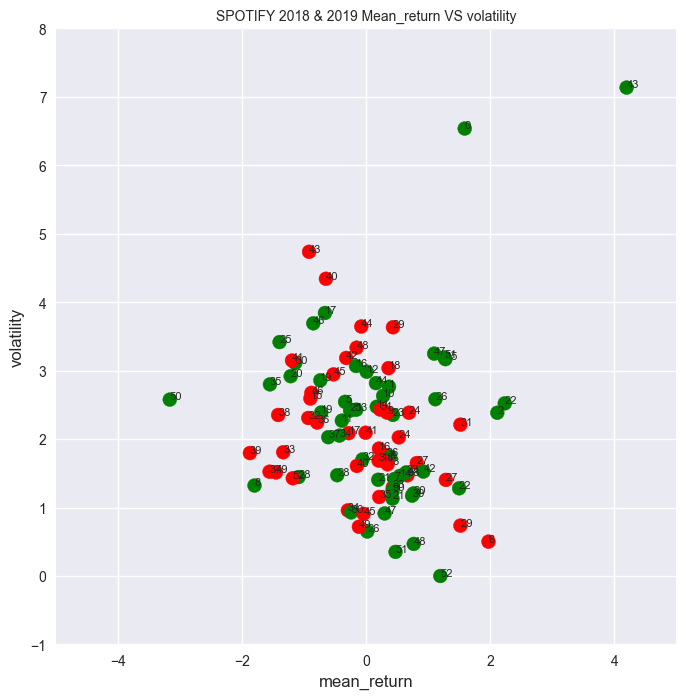

In [12]:
df_2018_2019 = df[(df['Year'] == 2018) | (df['Year'] == 2019)]
plt.figure(figsize =(8,8))
plt.scatter(df_2018_2019['mean_return'], df_2018_2019['volatility'], color = df_2018_2019['labels'], s=100 )
plt.xlabel("mean_return", size = 12)
plt.ylabel("volatility", size = 12)
plt.title("SPOTIFY 2018 & 2019 Mean_return VS volatility", size = 10)
plt . xlim (-5, 5)
plt . ylim (-1, 8)
for i, txt in enumerate(df_2018_2019['Week_Number']):
    plt.annotate(txt, (df_2018_2019.loc[ i ,'mean_return'], df_2018_2019.loc[i, 'volatility']), size=8)

plt.show()

## We can see for the year 2018 and 2019 scatterplot that the red and green labels are grouped together. Further we will be training multiple ML model based on this labels

# The ideology behind plotting this labels is to see whether the red and green labels are separable and to check if any new data point comes what label it should be? Which can eventually tell us wether the upcoming stock is going to raise or fall

# Let's try to see the trend of 2018 and 2019

In [13]:
dft = ((df['Year'] == 2018) | (df['Year'] == 2019))
dft = df[dft]
dft

Year  Week_Number  mean_return  volatility labels
0   2018           13        -0.16        2.43  green
1   2018           14         0.17        2.47  green
2   2018           15         1.28        3.17  green
3   2018           16         0.21        1.86    red
4   2018           17        -0.67        3.84  green
..   ...          ...          ...         ...    ...
88  2019           48         0.77        0.47  green
89  2019           49        -0.12        0.72    red
90  2019           50         0.42        1.25  green
91  2019           51         0.47        0.35  green
92  2019           52        -1.18        1.43    red

[93 rows x 5 columns]

In [14]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         93 non-null     int64  
 1   Week_Number  93 non-null     int64  
 2   mean_return  93 non-null     float64
 3   volatility   93 non-null     float64
 4   labels       93 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 4.4+ KB


In [15]:
dft['Year'] = dft['Year'].astype(str)
dft['Week_Number'] = dft['Week_Number'].astype(str)

dft['Concat'] = dft['Year'] + dft['Week_Number']
dft

Year Week_Number  mean_return  volatility labels  Concat
0   2018          13        -0.16        2.43  green  201813
1   2018          14         0.17        2.47  green  201814
2   2018          15         1.28        3.17  green  201815
3   2018          16         0.21        1.86    red  201816
4   2018          17        -0.67        3.84  green  201817
..   ...         ...          ...         ...    ...     ...
88  2019          48         0.77        0.47  green  201948
89  2019          49        -0.12        0.72    red  201949
90  2019          50         0.42        1.25  green  201950
91  2019          51         0.47        0.35  green  201951
92  2019          52        -1.18        1.43    red  201952

[93 rows x 6 columns]

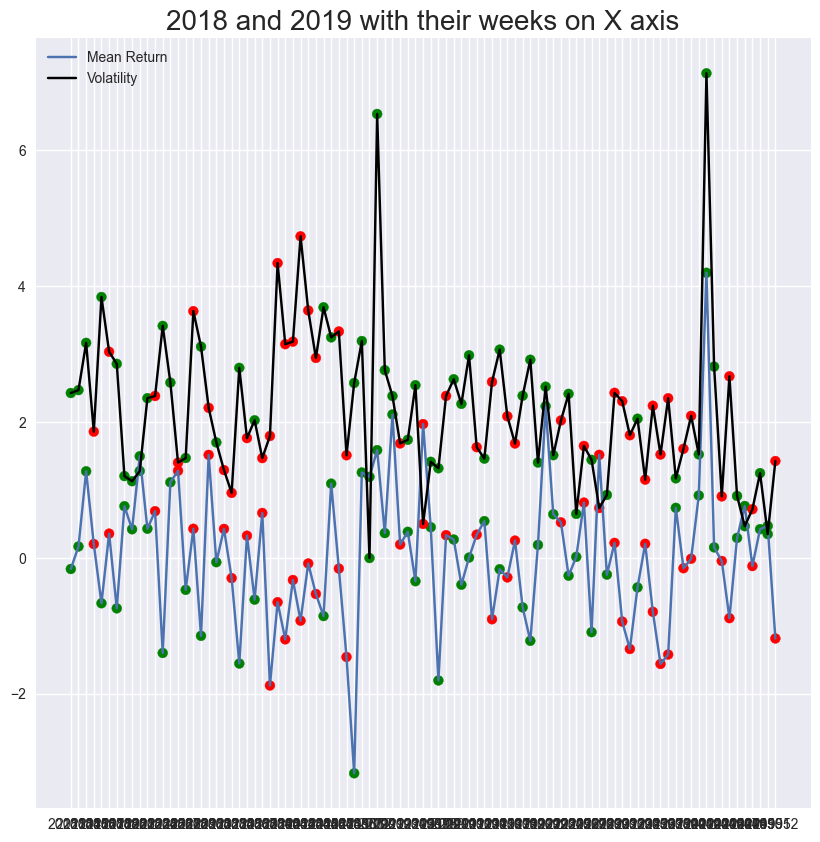

In [16]:
x1 = dft['Concat']

#x2 = dft["Week_Number"]
# plt.subplot()

plt.figure(figsize =(10 , 10))
y1 = dft['mean_return']
y2 = dft['volatility']

plt.scatter(dft['Concat'], dft['mean_return'], color = dft['labels'], s=50 )
plt.scatter(dft['Concat'], dft['volatility'], color = dft['labels'], s=50 )

plt.plot(x1, y1, label='Mean Return')
plt.plot(x1, y2, label='Volatility', color = 'k')
plt.title("2018 and 2019 with their weeks on X axis", size = 20)
plt.legend()
plt.show()

## We can clearly see the TREND is not repeating. I have plotted both mean_return and volatility

# Now Loading the Weekly_return_detailed Data

In [17]:
df_detailed = pd.read_csv('SPOT_weekly_return_detailed.csv')
df_detailed

Open   High    Low  Close  Adj Close    Volume  Return        Date  \
0    165.90 169.00 148.26 149.01     149.01  30526500    0.00  2018-04-03   
1    140.00 148.93 135.51 144.22     144.22  11702900   -3.21  2018-04-04   
2    149.23 152.41 141.25 143.99     143.99   7372800   -0.16  2018-04-05   
3    146.07 148.73 144.67 147.92     147.92   4228100    2.73  2018-04-06   
4    149.50 151.00 148.59 150.00     150.00   2051400    1.41  2018-04-09   
...     ...    ...    ...    ...        ...       ...     ...         ...   
1192  77.60  78.18  76.19  77.70      77.70    943900   -0.33  2022-12-23   
1193  76.65  76.92  73.93  76.52      76.52   1178600   -1.52  2022-12-27   
1194  76.09  78.24  76.07  76.61      76.61   1616300    0.12  2022-12-28   
1195  78.00  79.44  77.69  79.01      79.01    979200    3.13  2022-12-29   
1196  76.77  79.05  76.53  78.95      78.95   1255000   -0.08  2022-12-30   

      Week_Number  Year  Day    Weekday  mean_return  volatility  
0              13  2018    3    Tuesday        -0.16        2.43  
1              13  2018    4  Wednesday        -0.16        2.43  
2              13  2018    5   Thursday        -0.16        2.43  
3              13  2018    6     Friday        -0.16        2.43  
4              14  2018    9     Monday         0.17        2.47  
...           ...   ...  ...        ...          ...         ...  
1192           51  2022   23     Friday         0.80        2.37  
1193           52  2022   27    Tuesday         0.41        1.95  
1194           52  2022   28  Wednesday         0.41        1.95  
1195           52  2022   29   Thursday         0.41        1.95  
1196           52  2022   30     Friday         0.41        1.95  

[1197 rows x 14 columns]

# Now I'll be writing 2 Trading Strategy :-
# 1) Buy and Hold Strategy
# 2) Labelling Based Strategy              
## Then will be comparing which Strategy is best to use for investment. Will start with $100  as investment amount and will see which strategy gave us more profit

In [18]:
def buy_and_hold(data, year_no):
    df1 = data[(data['Year'] == year_no) & (data['Week_Number'] > 0)]
    df1 = df1.reset_index()
    df1 = df1.drop('index', axis = 1)
    
    first_day_open_price = df1.iloc[0]['Open']
    shares = 100/first_day_open_price
    
    last_day_adj_close_price = df1.iloc[-1]['Adj Close']
    investment = shares * last_day_adj_close_price
    return investment

### Buy and Hold strategy is basically means we buy some shares (with 100 dollar as investment amount) in the very first day of the opening price and sale all the shares (which accumulated all year long) at the very last day of the 'adj close' closing price. Below we can see if we invested 100 dollar in the year 2019 and use simple buy and hold strategy we would only get 130 dollars return

#### YEAR 2018

In [19]:
buy_and_hold(df_detailed,2018)

68.4147101722137

#### YEAR 2019

In [20]:
buy_and_hold(df_detailed,2019)

129.99826309247928

#### YEAR 2020

In [21]:
buy_and_hold(df_detailed,2020)

207.71007475889775

#### YEAR 2021

In [22]:
buy_and_hold(df_detailed,2021)

73.72881005582134

#### YEAR 2022

In [23]:
buy_and_hold(df_detailed,2022)

33.56004121072994

## Need to to merge both the data set for Labelling based Strategy

In [24]:
def lets_try(data, year):
    data = data[data['Year'] == year] 
    li = []
    for i in data['Week_Number']:
        re = data[data['Week_Number'] == i]
        var = max(re.index)
        li.append(var)
        
    data = data.loc[li]
    data.drop_duplicates(inplace=True)  
    data = data.reset_index()
    data = data.drop('index', axis = 1)
    return data

## Fetching only 2019 Year data weekwise

In [25]:
year_data = lets_try(df_detailed,2019)
year_data

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [26]:
trading_strategy_df = pd.merge(year_data, df_2019, how='inner', on='Week_Number')
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [27]:
trading_strategy_df['labels1'] = trading_strategy_df['labels'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

# The Labels here I'm using is the labels which I manually labelled and this strategy will tell us if we trade base on this labels and use this optimal strategy how much we would earn in the whole year. 

# Later we will be using the labels which our ML model will predict and will use this same strategy and trade on those labels and check how much profit we would earn

In [28]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels1'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels1'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Profit earned after selling the previous buyed shares",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels1'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels1'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels1'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
trading_strategy(trading_strategy_df)

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 113.63597649263265
shares buyed with the total amount which we earned previously=  0.8773623590498475
Total amount earned after selling the previous bought shares is 130.30586131457974
shares buyed with the total amount which we earned previously=  0.936038036277169
Total amount earned after selling the previous bought shares is 131.21380506958621
shares buyed with the total amount which we earned previously=  0.9191860250058579
Total amount earned after selling the previous bought shares is 129.72472819728975
shares buyed with the total amount which we earned previously=  0.9437270614086396
Total amount earned after selling the previous bought shares is 131.79147836566366
shares buyed with the total amount which we earned previously=  0.9926299173359276
Total amount earned after selling the previous bought shares is 135.1664140260736
shares buyed with the total amount 

171.34

### we can see that using "labelling based strategy" we got more return compared to "buy and hold strategy" for the year 2019

# **PRICE FORECASTING

## Now we will build LINEAR REGRESSION model for stock prices prediction. We will be using window sizes from 5 to 30, which means we will be taking first 5 days of data and applying linear regression on those days and try to predict for 6th day price, same if we are using Window size of 10 we will apply linear regression on those 10 days of data and try to predict what will be the stock price for the 11th day and so on....


In [29]:
df_detailed

Open   High    Low  Close  Adj Close    Volume  Return        Date  \
0    165.90 169.00 148.26 149.01     149.01  30526500    0.00  2018-04-03   
1    140.00 148.93 135.51 144.22     144.22  11702900   -3.21  2018-04-04   
2    149.23 152.41 141.25 143.99     143.99   7372800   -0.16  2018-04-05   
3    146.07 148.73 144.67 147.92     147.92   4228100    2.73  2018-04-06   
4    149.50 151.00 148.59 150.00     150.00   2051400    1.41  2018-04-09   
...     ...    ...    ...    ...        ...       ...     ...         ...   
1192  77.60  78.18  76.19  77.70      77.70    943900   -0.33  2022-12-23   
1193  76.65  76.92  73.93  76.52      76.52   1178600   -1.52  2022-12-27   
1194  76.09  78.24  76.07  76.61      76.61   1616300    0.12  2022-12-28   
1195  78.00  79.44  77.69  79.01      79.01    979200    3.13  2022-12-29   
1196  76.77  79.05  76.53  78.95      78.95   1255000   -0.08  2022-12-30   

      Week_Number  Year  Day    Weekday  mean_return  volatility  
0              13  2018    3    Tuesday        -0.16        2.43  
1              13  2018    4  Wednesday        -0.16        2.43  
2              13  2018    5   Thursday        -0.16        2.43  
3              13  2018    6     Friday        -0.16        2.43  
4              14  2018    9     Monday         0.17        2.47  
...           ...   ...  ...        ...          ...         ...  
1192           51  2022   23     Friday         0.80        2.37  
1193           52  2022   27    Tuesday         0.41        1.95  
1194           52  2022   28  Wednesday         0.41        1.95  
1195           52  2022   29   Thursday         0.41        1.95  
1196           52  2022   30     Friday         0.41        1.95  

[1197 rows x 14 columns]

In [30]:
df_detailed['Date'] = df_detailed['Date'].str.replace('-', '').astype(int)
df_detailed.head()

Open   High    Low  Close  Adj Close    Volume  Return      Date  \
0 165.90 169.00 148.26 149.01     149.01  30526500    0.00  20180403   
1 140.00 148.93 135.51 144.22     144.22  11702900   -3.21  20180404   
2 149.23 152.41 141.25 143.99     143.99   7372800   -0.16  20180405   
3 146.07 148.73 144.67 147.92     147.92   4228100    2.73  20180406   
4 149.50 151.00 148.59 150.00     150.00   2051400    1.41  20180409   

   Week_Number  Year  Day    Weekday  mean_return  volatility  
0           13  2018    3    Tuesday        -0.16        2.43  
1           13  2018    4  Wednesday        -0.16        2.43  
2           13  2018    5   Thursday        -0.16        2.43  
3           13  2018    6     Friday        -0.16        2.43  
4           14  2018    9     Monday         0.17        2.47

# Lets try on 2021 Year Data

In [31]:
df_2021 = df_detailed[df_detailed['Year']== 2021].reset_index(drop='index')
df_2021 

Open   High    Low  Close  Adj Close   Volume  Return      Date  \
0   317.42 318.69 305.51 311.00     311.00   945700   -1.16  20210104   
1   309.48 316.15 309.08 313.72     313.72   610400    0.88  20210105   
2   308.16 323.39 307.04 314.24     314.24  1024800    0.17  20210106   
3   317.44 332.60 316.25 331.36     331.36   977200    5.45  20210107   
4   335.00 354.60 333.29 353.11     353.11  2199700    6.56  20210108   
..     ...    ...    ...    ...        ...      ...     ...       ...   
247 236.71 237.75 230.23 233.78     233.78   963900   -1.20  20211227   
248 234.57 239.49 231.51 233.78     233.78   775200    0.00  20211228   
249 232.64 235.84 228.10 232.92     232.92  1155700   -0.37  20211229   
250 233.78 241.54 233.17 237.92     237.92   941500    2.15  20211230   
251 237.77 241.25 233.29 234.03     234.03   870600   -1.64  20211231   

     Week_Number  Year  Day    Weekday  mean_return  volatility  
0              1  2021    4     Monday         2.38        3.41  
1              1  2021    5    Tuesday         2.38        3.41  
2              1  2021    6  Wednesday         2.38        3.41  
3              1  2021    7   Thursday         2.38        3.41  
4              1  2021    8     Friday         2.38        3.41  
..           ...   ...  ...        ...          ...         ...  
247           52  2021   27     Monday        -0.21        1.47  
248           52  2021   28    Tuesday        -0.21        1.47  
249           52  2021   29  Wednesday        -0.21        1.47  
250           52  2021   30   Thursday        -0.21        1.47  
251           52  2021   31     Friday        -0.21        1.47  

[252 rows x 14 columns]

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Rolling Predictions

In [33]:

for k in range(5, 31):
    li = []
    li += [np.nan] * (k-1)

    for i in range(len(df_2021) - k):
        end = i + k - 1 
        selected_rows = df_2021.loc[i:end, ['Adj Close', 'Date']]
        X_train = selected_rows

        val = i + k
        rows = df_2021.loc[[val, ]]
        rows = rows[['Date']]
        Y_test = rows

        x = X_train['Date']
        y = X_train['Adj Close'] # adj close is the final closing price of a stock
        x = x.values.reshape(-1,1) 
        model = LinearRegression()  
        model.fit(x,y)
        
        y_pred = model.predict(Y_test)
        li.append(y_pred)
        
    d = pd.Series(li)
    col_name = 'window_' + str(k)
    
    df_2021.loc[:, col_name] = d
    df_2021.loc[:, col_name] = df_2021.loc[:, col_name].fillna(0)
    df_2021.loc[:, col_name] = df_2021.loc[:, col_name].astype(float)
    
df_2021


Open   High    Low  Close  Adj Close   Volume  Return      Date  \
0   317.42 318.69 305.51 311.00     311.00   945700   -1.16  20210104   
1   309.48 316.15 309.08 313.72     313.72   610400    0.88  20210105   
2   308.16 323.39 307.04 314.24     314.24  1024800    0.17  20210106   
3   317.44 332.60 316.25 331.36     331.36   977200    5.45  20210107   
4   335.00 354.60 333.29 353.11     353.11  2199700    6.56  20210108   
5   350.06 354.00 341.59 344.07     344.07  1105600   -2.56  20210111   
6   344.00 349.78 341.46 347.01     347.01   829600    0.85  20210112   
7   348.00 370.95 344.50 347.06     347.06  2412100    0.01  20210113   
8   349.70 349.70 339.06 342.27     342.27   853800   -1.38  20210114   
9   330.72 334.69 317.01 319.82     319.82  2352000   -6.56  20210115   
10  320.35 326.94 317.07 319.75     319.75  1252600   -0.02  20210119   
11  328.83 338.20 325.39 331.41     331.41  1044800    3.65  20210120   
12  337.91 350.25 333.78 348.30     348.30  1641800    5.10  20210121   
13  346.27 348.28 338.17 338.96     338.96  1083300   -2.68  20210122   
14  344.00 345.05 326.66 333.61     333.61  1393700   -1.58  20210125   
15  337.24 340.50 332.33 337.01     337.01   818300    1.02  20210126   
16  330.75 344.99 323.59 330.19     330.19  1549000   -2.02  20210127   
17  330.18 331.33 317.12 325.44     325.44  1532100   -1.44  20210128   
18  328.59 331.39 312.83 315.00     315.00  1485500   -3.21  20210129   
19  319.45 332.70 315.80 332.65     332.65  1186200    5.60  20210201   
20  339.68 350.25 338.85 345.05     345.05  1744500    3.73  20210202   
21  321.50 327.30 310.70 317.25     317.25  6296200   -8.06  20210203   
22  319.31 323.98 312.90 314.70     314.70  2451300   -0.80  20210204   
23  316.23 316.76 306.00 310.77     310.77  2342800   -1.25  20210205   
24  311.93 325.08 311.68 323.79     323.79  1609000    4.19  20210208   
25  323.37 334.62 320.41 334.00     334.00  1440500    3.15  20210209   
26  334.34 339.62 325.63 335.71     335.71  1492000    0.51  20210210   
27  335.90 337.88 325.95 331.90     331.90  1032400   -1.14  20210211   
28  333.94 340.43 329.39 339.70     339.70  1119500    2.35  20210212   
29  343.00 364.00 343.00 353.73     353.73  1923600    4.13  20210216   
30  349.41 355.71 342.73 355.19     355.19  1283000    0.41  20210217   
31  353.57 358.71 341.59 354.88     354.88  1386500   -0.09  20210218   
32  355.62 365.99 354.18 364.59     364.59  1313800    2.74  20210219   
33  360.91 387.44 344.00 349.91     349.91  4523400   -4.03  20210222   
34  332.57 337.88 310.34 336.31     336.31  4162000   -3.89  20210223   
35  335.22 339.20 324.00 334.69     334.69  1477600   -0.48  20210224   
36  330.00 335.00 302.60 303.06     303.06  2428200   -9.45  20210225   
37  300.00 311.83 295.34 307.38     307.38  2595700    1.43  20210226   
38  313.00 321.78 307.40 321.28     321.28  1539500    4.52  20210301   
39  320.07 326.15 316.34 322.74     322.74  1483000    0.45  20210302   
40  322.73 323.04 299.89 300.24     300.24  1636600   -6.97  20210303   
41  297.48 301.28 278.23 285.01     285.01  2591400   -5.07  20210304   
42  290.00 291.37 261.60 274.98     274.98  2599400   -3.52  20210305   
43  275.00 276.59 254.92 258.33     258.33  2108000   -6.05  20210308   
44  274.60 279.64 268.60 273.58     273.58  2424000    5.90  20210309   
45  282.73 284.02 269.40 270.19     270.19  1319500   -1.24  20210310   
46  276.01 289.40 273.07 286.96     286.96  1854800    6.21  20210311   
47  280.06 281.87 273.00 279.89     279.89   963500   -2.46  20210312   
48  282.99 286.38 275.67 285.46     285.46   866800    1.99  20210315   
49  289.00 292.66 280.27 284.69     284.69   891800   -0.27  20210316   
50  277.40 287.46 272.22 283.35     283.35   844700   -0.47  20210317   
51  278.45 279.92 266.14 271.73     271.73  1466800   -4.10  20210318   
52  269.99 275.20 267.46 272.11     272.11  1327100    0.14  20210319   
53  276.00 278.57 273.21 275.47     275.47   606500    1.24  202

In [34]:
window_data = df_2021.iloc[:, [3,4,7,9,11] + list(range(14, 40))  ]
window_data

Close  Adj Close      Date  Year    Weekday  window_5  window_6  \
0   311.00     311.00  20210104  2021     Monday      0.00      0.00   
1   313.72     313.72  20210105  2021    Tuesday      0.00      0.00   
2   314.24     314.24  20210106  2021  Wednesday      0.00      0.00   
3   331.36     331.36  20210107  2021   Thursday      0.00      0.00   
4   353.11     353.11  20210108  2021     Friday    375.62      0.00   
5   344.07     344.07  20210111  2021     Monday    358.45    358.52   
6   347.01     347.01  20210112  2021    Tuesday    354.97    356.99   
7   347.06     347.06  20210113  2021  Wednesday    349.41    354.70   
8   342.27     342.27  20210114  2021   Thursday    341.65    347.08   
9   319.82     319.82  20210115  2021     Friday    308.10    318.36   
10  319.75     319.75  20210119  2021    Tuesday    311.50    313.46   
11  331.41     331.41  20210120  2021  Wednesday    320.59    319.64   
12  348.30     348.30  20210121  2021   Thursday    335.69    332.38   
13  338.96     338.96  20210122  2021     Friday    351.27    340.04   
14  333.61     333.61  20210125  2021     Monday    341.71    343.39   
15  337.01     337.01  20210126  2021    Tuesday    335.71    340.27   
16  330.19     330.19  20210127  2021  Wednesday    328.79    332.19   
17  325.44     325.44  20210128  2021   Thursday    326.26    324.77   
18  315.00     315.00  20210129  2021     Friday    -32.80    103.31   
19  332.65     332.65  20210201  2021     Monday    332.23    332.03   
20  345.05     345.05  20210202  2021    Tuesday    339.10    338.88   
21  317.25     317.25  20210203  2021  Wednesday    331.86    331.72   
22  314.70     314.70  20210204  2021   Thursday    327.67    327.48   
23  310.77     310.77  20210205  2021     Friday    287.03    324.41   
24  323.79     323.79  20210208  2021     Monday    312.32    311.41   
25  334.00     334.00  20210209  2021    Tuesday    332.29    324.11   
26  335.71     335.71  20210210  2021  Wednesday    339.32    337.06   
27  331.90     331.90  20210211  2021   Thursday    341.20    339.65   
28  339.70     339.70  20210212  2021     Friday    350.85    356.44   
29  353.73     353.73  20210216  2021    Tuesday    355.21    356.46   
30  355.19     355.19  20210217  2021  Wednesday    359.09    358.20   
31  354.88     354.88  20210218  2021   Thursday    361.06    360.24   
32  364.59     364.59  20210219  2021     Friday    371.39    373.13   
33  349.91     349.91  20210222  2021     Monday    353.55    360.72   
34  336.31     336.31  20210223  2021    Tuesday    339.80    341.99   
35  334.69     334.69  20210224  2021  Wednesday    331.73    334.06   
36  303.06     303.06  20210225  2021   Thursday    306.91    312.91   
37  307.38     307.38  20210226  2021     Friday   -584.72   -369.05   
38  321.28     321.28  20210301  2021     Monday    320.51    319.67   
39  322.74     322.74  20210302  2021    Tuesday    321.97    321.65   
40  300.24     300.24  20210303  2021  Wednesday    314.91    314.53   
41  285.01     285.01  20210304  2021   Thursday    307.07    307.16   
42  274.98     274.98  20210305  2021     Friday    235.69    299.96   
43  258.33     258.33  20210308  2021     Monday    241.84    242.24   
44  273.58     273.58  20210309  2021    Tuesday    258.07    252.18   
45  270.19     270.19  20210310  2021  Wednesday    263.72    259.84   
46  286.96     286.96  20210311  2021   Thursday    277.86    273.20   
47  279.89     279.89  20210312  2021     Friday    302.04    283.74   
48  285.46     285.46  20210315  2021     Monday    289.19    293.35   
49  284.69     284.69  20210316  2021    Tuesday    288.03    288.46   
50  283.35     283.35  20210317  2021  Wednesday    284.09    287.04   
51  271.73     271.73  20210318  2021   Thursday    278.43    277.84   
52  272.11     272.11  20210319  2021     Friday    259.64    271.70   
53  275.47     275.47  20210322  2021     Monday    270.16    269.36   
54  267.30     267.30  20210323  2021    Tues

In [35]:
def strategy(data):
    short_position = 0
    long_position = 0
    position = 0
    shares = 0
    investment_amount = 100
    profit = 0
    loss = 0
    last_price = 0
    gain = 0
    avg = []
        
  
    for g in data.iloc[:, list(range(5,31))]:
        col = g
        index = data.loc[:, g] 
        i = index[index!=0].index.tolist()
        li = []
    
        
        for i in i:
            if(data.loc[i, 'Close'] > data.loc[i, col]  and short_position == 0 and long_position == 0): 
                shares = investment_amount/data.iloc[i]['Close']
                short_position += 1
                last_price = data.iloc[i]['Close']
                long_position = 0

            if(data.iloc[i]['Close'] < data.iloc[i][col] and short_position == 1 and  long_position == 0): 
                temp_share = shares
                shares = investment_amount/data.iloc[i]['Close']
                short_position -= 1
                long_position = 0
                gain = last_price - data.iloc[i]['Close']
                gain = round(gain,2)
                li.append(gain)

            if(data.iloc[i]['Close'] < data.iloc[i][col] and short_position == 0 and long_position == 0): 
                shares = investment_amount/data.iloc[i]['Close'] 
                long_position += 1
                short_position = 0
                last_price = data.iloc[i]['Close']

            if(data.iloc[i]['Close'] < data.iloc[i][col] and short_position == 0 and long_position == 1): 
                shares = shares
                long_position = 1
                short_position = 0

            if(data.iloc[i]['Close'] > data.iloc[i][col] and short_position == 0 and long_position == 1):
                temp_share = shares
                long_position -= 1
                short_position = 0
                gain = data.iloc[i]['Close'] - last_price
                gain = round(gain,2)
                li.append(gain)

            if(data.iloc[i]['Close'] > data.iloc[i][col] and short_position == 1 and long_position == 0): 
                shares = shares
                short_position = 1
                long_position = 0

            if(data.iloc[i]['Close'] == data.iloc[i][col]):
                continue

        avg_profits = sum(li)/len(li)
        avg_profits = round(avg_profits,4)
        avg.append(avg_profits)
    return avg
            
            
profit_loss = strategy(window_data)       
print(profit_loss)

[-1.1158, -1.2442, -1.8004, 0.1838, 0.53, 1.0476, 1.7833, 1.6805, 0.595, 3.1922, 1.163, 1.0646, -1.1467, -1.0051, -0.7969, -2.1408, -3.3344, -8.3068, -9.0083, -9.7376, -9.4017, -10.0611, -12.404, -13.35, -15.1724, -15.945]


In [36]:
profit = { 'Windows': list(range(5, 31)),
           'Profit_loss': profit_loss         
         }

final_data = pd.DataFrame(profit)
final_data

Windows  Profit_loss
0         5        -1.12
1         6        -1.24
2         7        -1.80
3         8         0.18
4         9         0.53
5        10         1.05
6        11         1.78
7        12         1.68
8        13         0.59
9        14         3.19
10       15         1.16
11       16         1.06
12       17        -1.15
13       18        -1.01
14       19        -0.80
15       20        -2.14
16       21        -3.33
17       22        -8.31
18       23        -9.01
19       24        -9.74
20       25        -9.40
21       26       -10.06
22       27       -12.40
23       28       -13.35
24       29       -15.17
25       30       -15.95

# Year 2021 Data PRICE FORECASTING look like this 

#### Change year data to see different results

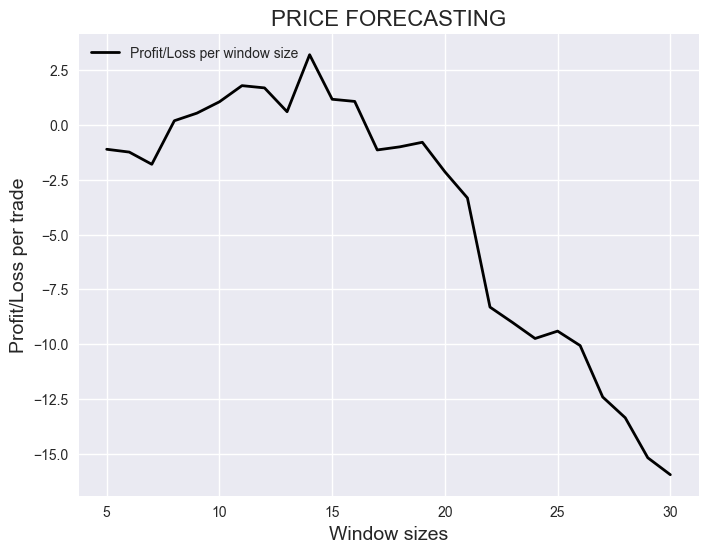

Optimal window size: 14


In [37]:
plt.figure(figsize=(8,6))
plt.plot(final_data['Windows'], final_data['Profit_loss'], color='k', linewidth=2)
plt.xlabel('Window sizes', fontsize=14)
plt.ylabel('Profit/Loss per trade', fontsize=14)
plt.title('PRICE FORECASTING', fontsize=16)

plt.legend(['Profit/Loss per window size'], loc='upper left')
plt.show()

max_profit_loss_window = final_data['Windows'][final_data['Profit_loss'].idxmax()]

print('Optimal window size:', max_profit_loss_window )


# Now we will take this process to a next level and will be using polynomial function of 1,2,3 degree for predicting next week labels based on previous week closing price. The process is very similar to what we did before we take days suppose 5 and if the 6th day price is greater than 5th day we assign "Green" label and if less we assign "Red" label and if same price we assign the same label of the last day

In [38]:
final_df = trading_strategy_df[['Close','Adj Close','Week_Number','Year_x', 'Weekday', 'mean_return_x','volatility_x','labels']]
final_df

Close  Adj Close  Week_Number  Year_x   Weekday  mean_return_x  \
0  118.51     118.51            0    2019    Friday           1.59   
1  120.52     120.52            1    2019    Friday           0.37   
2  133.66     133.66            2    2019    Friday           2.11   
3  134.67     134.67            3    2019    Friday           0.20   
4  137.21     137.21            4    2019    Friday           0.39   
5  134.71     134.71            5    2019    Friday          -0.34   
6  148.52     148.52            6    2019    Friday           1.97   
7  151.19     151.19            7    2019    Friday           0.45   
8  138.00     138.00            8    2019    Friday          -1.80   
9  140.18     140.18            9    2019    Friday           0.34   
10 141.91     141.91           10    2019    Friday           0.27   
11 139.00     139.00           11    2019    Friday          -0.39   
12 138.80     138.80           12    2019    Friday           0.01   
13 141.13     141.13           13    2019    Friday           0.34   
14 144.95     144.95           14    2019    Friday           0.54   
15 139.65     139.65           15    2019  Thursday          -0.90   
16 138.25     138.25           16    2019    Friday          -0.16   
17 136.17     136.17           17    2019    Friday          -0.29   
18 137.85     137.85           18    2019    Friday           0.26   
19 132.76     132.76           19    2019    Friday          -0.73   
20 124.65     124.65           20    2019    Friday          -1.22   
21 125.58     125.58           21    2019    Friday           0.19   
22 140.08     140.08           22    2019    Friday           2.23   
23 144.59     144.59           23    2019    Friday           0.64   
24 148.31     148.31           24    2019    Friday           0.53   
25 146.22     146.22           25    2019    Friday          -0.26   
26 146.31     146.31           26    2019    Friday           0.02   
27 152.30     152.30           27    2019    Friday           0.82   
28 144.11     144.11           28    2019    Friday          -1.09   
29 155.38     155.38           29    2019    Friday           1.52   
30 153.47     153.47           30    2019    Friday          -0.24   
31 155.01     155.01           31    2019    Friday           0.22   
32 147.74     147.74           32    2019    Friday          -0.93   
33 138.02     138.02           33    2019    Friday          -1.34   
34 134.95     134.95           34    2019    Friday          -0.43   
35 136.06     136.06           35    2019    Friday           0.21   
36 130.63     130.63           36    2019    Friday          -0.79   
37 120.70     120.70           37    2019    Friday          -1.56   
38 112.24     112.24           38    2019    Friday          -1.42   
39 116.42     116.42           39    2019    Friday           0.74   
40 115.49     115.49           40    2019    Friday          -0.15   
41 115.33     115.33           41    2019    Friday          -0.01   
42 120.69     120.69           42    2019    Friday           0.92   
43 146.92     146.92           43    2019    Friday           4.20   
44 147.85     147.85           44    2019    Friday           0.16   
45 147.51     147.51           45    2019    Friday          -0.04   
46 140.89     140.89           46    2019    Friday          -0.89   
47 142.55     142.55           47    2019    Friday           0.30   
48 148.09     148.09           48    2019    Friday           0.77   
49 147.20     147.20           49    2019    Friday          -0.12   
50 150.31     150.31           50    2019    Friday           0.42   
51 153.17     153.17           51    2019    Friday           0.47   
52 149.55     149.55           52    2019   Tuesday          -1.18   

    volatility_x labels  
0           6.54  green  
1           2.77  green  
2           2.39  green  
3           1.69    red  
4           1.74  green  
5           2.54  green  
6           0.50    red  
7           1.4

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

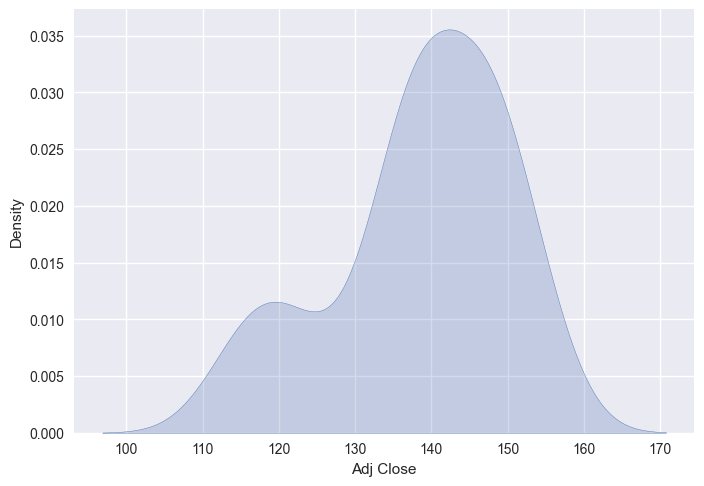

In [39]:
sns.kdeplot(data=final_df['Adj Close'], fill=True)

In [40]:
def predict_labels(data):
    predictions = []
    
    predictions += [np.nan] * (w)
    
    for v in data.iloc[:, [-1]]:
        col = v
        index = data.loc[:, v] 
        i = index[index!=0].index.tolist()
            
        for i in i:
            if (data.iloc[i]['Adj Close'] > float(data.iloc[i][col])):
                a = 'red'
                predictions.append(a)
            if (data.loc[i, 'Adj Close'] < data.loc[i, col]):
                b = 'green'
                predictions.append(b)
            if (data.loc[i, 'Adj Close'] == data.loc[i, col]):
                c = data.loc[i, 'labels']
                predictions.append(c)
        
        cols_name = 'W_' + str(w) + 'd_' + str(d) + '_Pred_Lbl'
        labes = pd.Series(predictions)
        final_df.loc[:, cols_name] = labes
        final_df.loc[:, cols_name] = final_df.loc[:, cols_name].fillna(0)       

    return final_df

for w in range(5,13):
    
    for d in range(1, 4):
        window = []
        degree = []
        degree += [np.nan] * (w)
        for i in range(len(final_df) - w):
            end = i + w - 1 
            selected_rows = final_df.loc[i:end, ['Adj Close', 'Week_Number']]
            X_train = selected_rows

            val = i + w
            rows = final_df.loc[[val, ]]
            rows = rows[['Adj Close','Week_Number']]
            Y_test = rows

            x = X_train['Week_Number']
            y = X_train['Adj Close']
            x_test = Y_test['Week_Number']

            deg = d
            coeffs = np.polyfit(x, y, deg)
            poly_func = np.poly1d(coeffs)
            y_pred = poly_func(x_test)
            degree.append(y_pred[0])

        window += degree

        col_name = 'window_' + str(w) + 'deg_' +str(d)
        values = pd.Series(window)
        final_df.loc[:, col_name] = values
        final_df.loc[:, col_name] = final_df.loc[:, col_name].fillna(0)
        final_df.loc[:, col_name] = final_df.loc[:, col_name].astype(float)
        
        predict_labels(final_df)
        
        
        
final_df


Close  Adj Close  Week_Number  Year_x   Weekday  mean_return_x  \
0  118.51     118.51            0    2019    Friday           1.59   
1  120.52     120.52            1    2019    Friday           0.37   
2  133.66     133.66            2    2019    Friday           2.11   
3  134.67     134.67            3    2019    Friday           0.20   
4  137.21     137.21            4    2019    Friday           0.39   
5  134.71     134.71            5    2019    Friday          -0.34   
6  148.52     148.52            6    2019    Friday           1.97   
7  151.19     151.19            7    2019    Friday           0.45   
8  138.00     138.00            8    2019    Friday          -1.80   
9  140.18     140.18            9    2019    Friday           0.34   
10 141.91     141.91           10    2019    Friday           0.27   
11 139.00     139.00           11    2019    Friday          -0.39   
12 138.80     138.80           12    2019    Friday           0.01   
13 141.13     141.13           13    2019    Friday           0.34   
14 144.95     144.95           14    2019    Friday           0.54   
15 139.65     139.65           15    2019  Thursday          -0.90   
16 138.25     138.25           16    2019    Friday          -0.16   
17 136.17     136.17           17    2019    Friday          -0.29   
18 137.85     137.85           18    2019    Friday           0.26   
19 132.76     132.76           19    2019    Friday          -0.73   
20 124.65     124.65           20    2019    Friday          -1.22   
21 125.58     125.58           21    2019    Friday           0.19   
22 140.08     140.08           22    2019    Friday           2.23   
23 144.59     144.59           23    2019    Friday           0.64   
24 148.31     148.31           24    2019    Friday           0.53   
25 146.22     146.22           25    2019    Friday          -0.26   
26 146.31     146.31           26    2019    Friday           0.02   
27 152.30     152.30           27    2019    Friday           0.82   
28 144.11     144.11           28    2019    Friday          -1.09   
29 155.38     155.38           29    2019    Friday           1.52   
30 153.47     153.47           30    2019    Friday          -0.24   
31 155.01     155.01           31    2019    Friday           0.22   
32 147.74     147.74           32    2019    Friday          -0.93   
33 138.02     138.02           33    2019    Friday          -1.34   
34 134.95     134.95           34    2019    Friday          -0.43   
35 136.06     136.06           35    2019    Friday           0.21   
36 130.63     130.63           36    2019    Friday          -0.79   
37 120.70     120.70           37    2019    Friday          -1.56   
38 112.24     112.24           38    2019    Friday          -1.42   
39 116.42     116.42           39    2019    Friday           0.74   
40 115.49     115.49           40    2019    Friday          -0.15   
41 115.33     115.33           41    2019    Friday          -0.01   
42 120.69     120.69           42    2019    Friday           0.92   
43 146.92     146.92           43    2019    Friday           4.20   
44 147.85     147.85           44    2019    Friday           0.16   
45 147.51     147.51           45    2019    Friday          -0.04   
46 140.89     140.89           46    2019    Friday          -0.89   
47 142.55     142.55           47    2019    Friday           0.30   
48 148.09     148.09           48    2019    Friday           0.77   
49 147.20     147.20           49    2019    Friday          -0.12   
50 150.31     150.31           50    2019    Friday           0.42   
51 153.17     153.17           51    2019    Friday           0.47   
52 149.55     149.55           52    2019   Tuesday          -1.18   

    volatility_x labels  window_5deg_1 W_5d_1_Pred_Lbl  window_5deg_2  \
0           6.54  green           0.00               0           0.00   
1           2.77  green           0.00               0           0.00   
2   

In [41]:
acc_deg = {1: [], 2: [], 3: []}

for w in range(5, 13):
    for d in range(1, 4):
        y_true = final_df.loc[w:, 'labels']
        pred = final_df.loc[w:, 'W_' + str(w) + 'd_' + str(d) + '_Pred_Lbl']
        accuracy = accuracy_score(y_true, pred)
        acc_deg[d].append(accuracy)   
    
    
Data = {
    'Window' : list(range(5,13)),
    'Degree_1_acc' : acc_deg[1],
    'Degree_2_acc' : acc_deg[2],
    'Degree_3_acc' : acc_deg[3]}        

Final_Data = pd.DataFrame(Data)
Final_Data


Window  Degree_1_acc  Degree_2_acc  Degree_3_acc
0       5          0.48          0.50          0.54
1       6          0.49          0.47          0.47
2       7          0.46          0.48          0.48
3       8          0.47          0.42          0.44
4       9          0.50          0.43          0.43
5      10          0.47          0.51          0.47
6      11          0.50          0.43          0.40
7      12          0.49          0.49          0.34

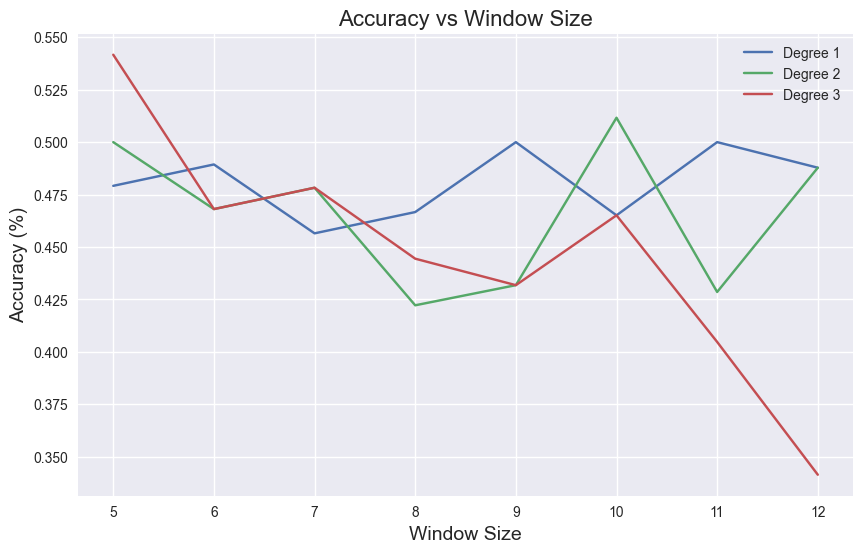

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

for d in range(1, 4):
    ax.plot(Final_Data['Window'], Final_Data['Degree_'+str(d)+'_acc'], label=f'Degree {d}')

ax.set_xlabel('Window Size', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Accuracy vs Window Size', fontsize=16)
ax.legend()
ax.grid(True)
plt.show()

# The higher accuracy we acheived is by Degree 3 with window size of 5

### Change the year data to see the different results

In [43]:
w1 = Final_Data['Window'][Final_Data['Degree_1_acc'].idxmax()]
w2 = Final_Data['Window'][Final_Data['Degree_2_acc'].idxmax()]
w3 = Final_Data['Window'][Final_Data['Degree_3_acc'].idxmax()]

print('Optimal window size for Degree 1 from Year 2019:', w1)

print('Optimal window size for Degree 2 from Year 2019:', w2)
print('Optimal window size for Degree 3 from Year 2019:', w3)


Optimal window size for Degree 1 from Year 2019: 9
Optimal window size for Degree 2 from Year 2019: 10
Optimal window size for Degree 3 from Year 2019: 5


# Now we will be performing TREND ANALYSIS

### Now we are interested in finding on which day (k) a significant change was noticed on every month of a year. For that we need to find the BEST k (which gives smaller loss) to break the days of a month into 2 parts and apply linear regression in both the part of the days. After getting the optimal k and applying simple linear regression (SLR) we will calculate the sum of square of residuals of 2 lines and degree of freedom for SLR is 2  (for 2 lines it wil be  2+2=4) then we will be calculating F statistic.  

In [44]:
df_detailed = pd.read_csv('SPOT_weekly_return_detailed.csv')
df_detailed

Open   High    Low  Close  Adj Close    Volume  Return        Date  \
0    165.90 169.00 148.26 149.01     149.01  30526500    0.00  2018-04-03   
1    140.00 148.93 135.51 144.22     144.22  11702900   -3.21  2018-04-04   
2    149.23 152.41 141.25 143.99     143.99   7372800   -0.16  2018-04-05   
3    146.07 148.73 144.67 147.92     147.92   4228100    2.73  2018-04-06   
4    149.50 151.00 148.59 150.00     150.00   2051400    1.41  2018-04-09   
5    152.00 156.74 151.13 154.90     154.90   2980000    3.27  2018-04-10   
6    154.00 154.15 147.50 149.57     149.57   1874000   -3.44  2018-04-11   
7    150.25 151.00 148.65 149.10     149.10   1371900   -0.31  2018-04-12   
8    149.80 150.42 148.05 149.00     149.00   1608100   -0.07  2018-04-13   
9    150.00 150.00 142.74 144.32     144.32   1454700   -3.14  2018-04-16   
10   146.02 149.84 146.00 148.49     148.49   1743100    2.89  2018-04-17   
11   149.94 155.99 149.56 154.91     154.91   2235300    4.32  2018-04-18   
12   154.40 155.03 152.01 153.47     153.47   1056900   -0.93  2018-04-19   
13   152.35 159.00 151.23 158.45     158.45   2339000    3.25  2018-04-20   
14   159.40 160.68 154.61 158.04     158.04   2436500   -0.26  2018-04-23   
15   159.00 159.26 153.52 155.07     155.07   1180400   -1.88  2018-04-24   
16   153.95 154.60 150.06 153.33     153.33   1884600   -1.12  2018-04-25   
17   153.00 157.80 151.32 156.60     156.60   1277200    2.13  2018-04-26   
18   157.37 160.00 157.00 159.98     159.98   1737800    2.16  2018-04-27   
19   161.51 162.88 159.70 161.67     161.67   3638400    1.06  2018-04-30   
20   162.12 165.17 161.21 164.88     164.88   2963900    1.99  2018-05-01   
21   166.52 171.23 166.00 170.00     170.00   6942800    3.10  2018-05-02   
22   154.12 161.11 151.11 160.38     160.38  11094800   -5.66  2018-05-03   
23   161.11 161.11 152.56 154.26     154.26   4292600   -3.82  2018-05-04   
24   154.50 154.71 148.06 150.00     150.00   5623700   -2.76  2018-05-07   
25   151.02 154.65 150.26 150.64     150.64   2460300    0.43  2018-05-08   
26   150.52 150.97 148.49 150.07     150.07   1857400   -0.38  2018-05-09   
27   151.40 159.95 150.35 158.13     158.13   3606600    5.37  2018-05-10   
28   158.00 158.24 155.28 156.77     156.77   1601300   -0.86  2018-05-11   
29   159.48 164.95 156.77 159.97     159.97   4753300    2.04  2018-05-14   
30   156.75 160.99 155.32 158.71     158.71   2976200   -0.79  2018-05-15   
31   158.16 163.00 158.08 161.39     161.39   2077800    1.69  2018-05-16   
32   159.17 159.48 156.75 158.76     158.76   2470900   -1.63  2018-05-17   
33   160.00 160.05 150.78 150.80     150.80   4152400   -5.01  2018-05-18   
34   153.36 153.74 149.98 150.22     150.22   1948700   -0.39  2018-05-21   
35   150.63 153.39 150.05 150.43     150.43   1194400    0.14  2018-05-22   
36   150.43 154.56 150.00 154.37     154.37   1202600    2.62  2018-05-23   
37   154.32 156.87 153.34 154.59     154.59   1083300    0.14  2018-05-24   
38   155.71 157.75 154.70 156.60     156.60   1288500    1.30  2018-05-25   
39   156.10 156.56 152.63 154.62     154.62   1314300   -1.26  2018-05-29   
40   156.60 156.93 153.71 156.38     156.38   1085500    1.14  2018-05-30   
41   156.82 158.85 155.15 157.71     157.71   1446800    0.85  2018-05-31   
42   158.90 161.81 157.35 159.24     159.24   1952400    0.97  2018-06-01   
43   159.54 162.97 158.10 162.83     162.83   2016900    2.25  2018-06-04   
44   162.50 165.06 161.23 164.96     164.96   1694400    1.31  2018-06-05   
45   164.09 165.64 159.21 165.64     165.64   2264400    0.41  2018-06-06   
46   168.75 168.75 164.66 166.03     166.03   2207400    0.23  2018-06-07   
47   165.50 172.93 165.04 171.48     171.48   3528900    3.28  2018-06-08   
48   171.50 172.75 169.22 172.37     172.37   2347400    0.52  2018-06-11   
49   173.00 175.93 169.89 170.23     170.23   2231500   -1.24  2018-06-12   
50   172.17 172.75 170.00 170.82     170.82   1230700    0.35  2018-06-13   
51 

In [45]:
df_detailed['Date'] = pd.to_datetime(df_detailed['Date'])
df_detailed['Month'] = df_detailed['Date'].dt.month
df_detailed

Open   High    Low  Close  Adj Close    Volume  Return       Date  \
0    165.90 169.00 148.26 149.01     149.01  30526500    0.00 2018-04-03   
1    140.00 148.93 135.51 144.22     144.22  11702900   -3.21 2018-04-04   
2    149.23 152.41 141.25 143.99     143.99   7372800   -0.16 2018-04-05   
3    146.07 148.73 144.67 147.92     147.92   4228100    2.73 2018-04-06   
4    149.50 151.00 148.59 150.00     150.00   2051400    1.41 2018-04-09   
5    152.00 156.74 151.13 154.90     154.90   2980000    3.27 2018-04-10   
6    154.00 154.15 147.50 149.57     149.57   1874000   -3.44 2018-04-11   
7    150.25 151.00 148.65 149.10     149.10   1371900   -0.31 2018-04-12   
8    149.80 150.42 148.05 149.00     149.00   1608100   -0.07 2018-04-13   
9    150.00 150.00 142.74 144.32     144.32   1454700   -3.14 2018-04-16   
10   146.02 149.84 146.00 148.49     148.49   1743100    2.89 2018-04-17   
11   149.94 155.99 149.56 154.91     154.91   2235300    4.32 2018-04-18   
12   154.40 155.03 152.01 153.47     153.47   1056900   -0.93 2018-04-19   
13   152.35 159.00 151.23 158.45     158.45   2339000    3.25 2018-04-20   
14   159.40 160.68 154.61 158.04     158.04   2436500   -0.26 2018-04-23   
15   159.00 159.26 153.52 155.07     155.07   1180400   -1.88 2018-04-24   
16   153.95 154.60 150.06 153.33     153.33   1884600   -1.12 2018-04-25   
17   153.00 157.80 151.32 156.60     156.60   1277200    2.13 2018-04-26   
18   157.37 160.00 157.00 159.98     159.98   1737800    2.16 2018-04-27   
19   161.51 162.88 159.70 161.67     161.67   3638400    1.06 2018-04-30   
20   162.12 165.17 161.21 164.88     164.88   2963900    1.99 2018-05-01   
21   166.52 171.23 166.00 170.00     170.00   6942800    3.10 2018-05-02   
22   154.12 161.11 151.11 160.38     160.38  11094800   -5.66 2018-05-03   
23   161.11 161.11 152.56 154.26     154.26   4292600   -3.82 2018-05-04   
24   154.50 154.71 148.06 150.00     150.00   5623700   -2.76 2018-05-07   
25   151.02 154.65 150.26 150.64     150.64   2460300    0.43 2018-05-08   
26   150.52 150.97 148.49 150.07     150.07   1857400   -0.38 2018-05-09   
27   151.40 159.95 150.35 158.13     158.13   3606600    5.37 2018-05-10   
28   158.00 158.24 155.28 156.77     156.77   1601300   -0.86 2018-05-11   
29   159.48 164.95 156.77 159.97     159.97   4753300    2.04 2018-05-14   
30   156.75 160.99 155.32 158.71     158.71   2976200   -0.79 2018-05-15   
31   158.16 163.00 158.08 161.39     161.39   2077800    1.69 2018-05-16   
32   159.17 159.48 156.75 158.76     158.76   2470900   -1.63 2018-05-17   
33   160.00 160.05 150.78 150.80     150.80   4152400   -5.01 2018-05-18   
34   153.36 153.74 149.98 150.22     150.22   1948700   -0.39 2018-05-21   
35   150.63 153.39 150.05 150.43     150.43   1194400    0.14 2018-05-22   
36   150.43 154.56 150.00 154.37     154.37   1202600    2.62 2018-05-23   
37   154.32 156.87 153.34 154.59     154.59   1083300    0.14 2018-05-24   
38   155.71 157.75 154.70 156.60     156.60   1288500    1.30 2018-05-25   
39   156.10 156.56 152.63 154.62     154.62   1314300   -1.26 2018-05-29   
40   156.60 156.93 153.71 156.38     156.38   1085500    1.14 2018-05-30   
41   156.82 158.85 155.15 157.71     157.71   1446800    0.85 2018-05-31   
42   158.90 161.81 157.35 159.24     159.24   1952400    0.97 2018-06-01   
43   159.54 162.97 158.10 162.83     162.83   2016900    2.25 2018-06-04   
44   162.50 165.06 161.23 164.96     164.96   1694400    1.31 2018-06-05   
45   164.09 165.64 159.21 165.64     165.64   2264400    0.41 2018-06-06   
46   168.75 168.75 164.66 166.03     166.03   2207400    0.23 2018-06-07   
47   165.50 172.93 165.04 171.48     171.48   3528900    3.28 2018-06-08   
48   171.50 172.75 169.22 172.37     172.37   2347400    0.52 2018-06-11   
49   173.00 175.93 169.89 170.23     170.23   2231500   -1.24 2018-06-12   
50   172.17 172.75 170.00 170.82     170.82   1230700    0.35 2018-06-13   
51   169.50 180.02 169.49 178.10     178.10   4311600  

In [46]:
print("2019 year")
print("Change the year data to see different results make sure to make necessary changes")
alpha = 0.1 # at 99% confidence interval 

for i in range(1,13):
    df_8 = df_detailed[(df_detailed['Month'] == i) & (df_detailed['Year'] == 2019)]
    month_data = df_8.groupby(by='Month')
    group = month_data[['Adj Close','Date','Month','Day' ]].get_group(i).reset_index(drop='index')
#    print(group)
    X = df_8['Day'].values.reshape(-1, 1)  # reshape for single feature
    y = df_8['Adj Close'].values
    least_loss = float('inf')
    n = len(group)
#    print(n)
    for k in range(2, n):
        
        x1,x2 = X[:k],X[k:]
        y1,y2 = y[:k],y[k:]
        
        reg2 = LinearRegression().fit(x1.reshape(-1, 1), y1)
        reg3 = LinearRegression().fit(x2.reshape(-1, 1), y2)

        
        SSR1 = np.sum((y1 - reg2.predict(x1.reshape(-1, 1)))**2)
        SSR2 = np.sum((y2 - reg3.predict(x2.reshape(-1, 1)))**2)

        t_loss = SSR1 + SSR2
        print("k",k, "total loss", t_loss )
        if t_loss < least_loss:
            least_loss = t_loss
            opt_k = k
     
    
    x1,x2 = X[:opt_k],X[opt_k:]   # Line 1 with optimal k of a month
    y1,y2 = y[:opt_k],y[opt_k:]   # Line 2 with optimal k of a month
        
    reg2 = LinearRegression().fit(x1.reshape(-1, 1), y1)
    reg3 = LinearRegression().fit(x2.reshape(-1, 1), y2)
    model = LinearRegression().fit(X,y)
    
    L1 = np.sum((y1 - reg2.predict(x1.reshape(-1, 1)))**2)   # Line 1 
    L2 = np.sum((y2 - reg3.predict(x2.reshape(-1, 1)))**2)   # Line 2
    
    L = np.sum((y - model.predict(X .reshape(-1, 1)))**2)    # Single line linear regression sum of square of residuals 
    print(L)
    degree_of_freedom = 2
    if L1 + L2 != 0:
        F_stat = ((L - (L1 + L2)) / (degree_of_freedom - 1)) / ((L1 + L2) / (n - degree_of_freedom))  # F stat Formula
    else:
        F_stat = 0

    critical_value = 1 - fisher_f.cdf(F_stat, degree_of_freedom - 1 , n - degree_of_freedom)
    if critical_value < alpha:
        print("Month",i,": Significant change in pricing trend observed on day",opt_k)
    else:
        print("Month",i,": no significant change") 
    
             

2019 year
Change the year data to see different results make sure to make necessary changes
k 2 total loss 185.90680594220825
k 3 total loss 217.38657244684572
k 4 total loss 209.98388975381334
k 5 total loss 174.14602148802817
k 6 total loss 169.36912845955774
k 7 total loss 162.38700861980865
k 8 total loss 103.5358730547639
k 9 total loss 79.18929688891123
k 10 total loss 84.58488842237894
k 11 total loss 93.132605592094
k 12 total loss 92.60582019572274
k 13 total loss 90.1087648192392
k 14 total loss 112.41595371196213
k 15 total loss 161.21254246446597
k 16 total loss 183.59682523999962
k 17 total loss 187.09957945935932
k 18 total loss 223.91370778610354
k 19 total loss 259.50501427317954
k 20 total loss 264.41445875459505
276.60529877724593
Month 1 : Significant change in pricing trend observed on day 9
k 2 total loss 302.8420384133772
k 3 total loss 297.15138952667746
k 4 total loss 301.7739662871097
k 5 total loss 256.0048430587407
k 6 total loss 204.23094584130283
k 7 total 

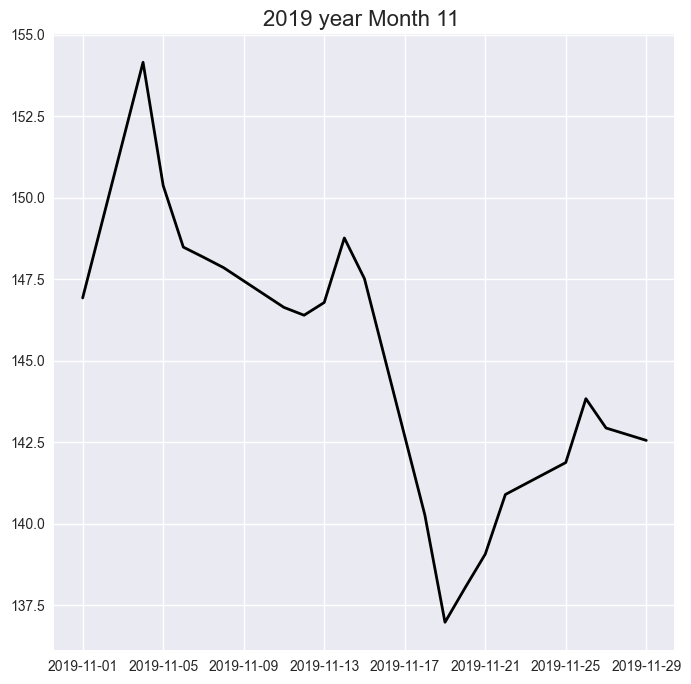

In [47]:
df2 = df_detailed[(df_detailed['Year'] == 2019) & (df_detailed['Month'] == 11) ]
plt.figure(figsize=(8,8))
plt.plot(df2['Date'], df2['Adj Close'], color='k', linewidth=2)
plt.title('2019 year Month 11 ', fontsize=16)
plt.show()

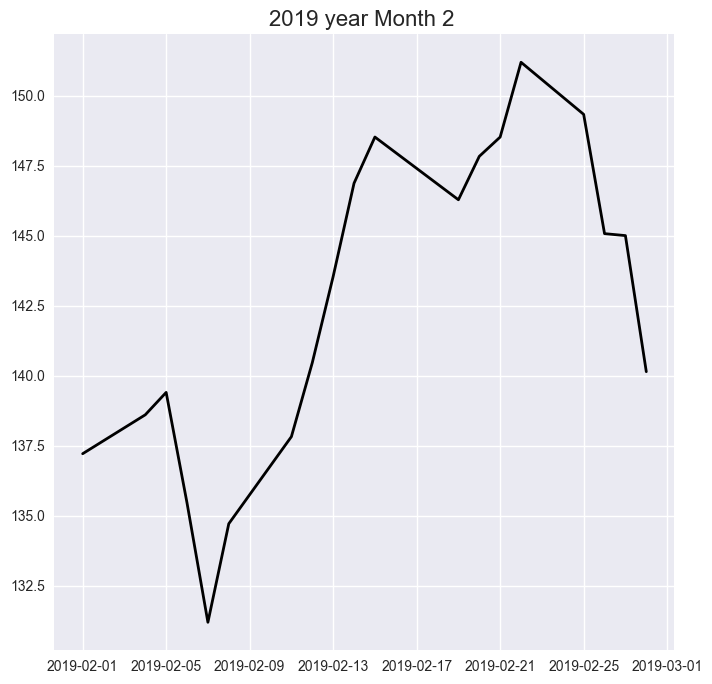

In [48]:
df2 = df_detailed[(df_detailed['Year'] == 2019) & (df_detailed['Month'] == 2) ]
plt.figure(figsize=(8,8))
plt.plot(df2['Date'], df2['Adj Close'], color='k', linewidth=2)
plt.title('2019 year Month 2 ', fontsize=16)
plt.show()

# Now we will be building many other ML models. We will train on 2018 year labelled data and test on 2019 year labelled data along with we will compute the accuracy, confusion matrix, sensitivity, specificity, F1-score and then we will trade on the labels that the ML model predicted

In [49]:
df

Year  Week_Number  mean_return  volatility labels
0    2018           13        -0.16        2.43  green
1    2018           14         0.17        2.47  green
2    2018           15         1.28        3.17  green
3    2018           16         0.21        1.86    red
4    2018           17        -0.67        3.84  green
5    2018           18         0.36        3.04    red
6    2018           19        -0.74        2.86  green
7    2018           20         0.76        1.21  green
8    2018           21         0.42        1.13  green
9    2018           22         1.50        1.28  green
10   2018           23         0.43        2.35  green
11   2018           24         0.69        2.39    red
12   2018           25        -1.40        3.42  green
13   2018           26         1.12        2.58  green
14   2018           27         1.28        1.40    red
15   2018           28        -0.47        1.47  green
16   2018           29         0.43        3.63    red
17   2018           30        -1.15        3.11  green
18   2018           31         1.52        2.21    red
19   2018           32        -0.06        1.70  green
20   2018           33         0.43        1.30    red
21   2018           34        -0.30        0.96    red
22   2018           35        -1.55        2.80  green
23   2018           36         0.33        1.77    red
24   2018           37        -0.61        2.03  green
25   2018           38         0.66        1.47    red
26   2018           39        -1.88        1.80    red
27   2018           40        -0.65        4.34    red
28   2018           41        -1.20        3.15    red
29   2018           42        -0.32        3.19    red
30   2018           43        -0.92        4.74    red
31   2018           44        -0.08        3.65    red
32   2018           45        -0.53        2.95    red
33   2018           46        -0.85        3.69  green
34   2018           47         1.10        3.25  green
35   2018           48        -0.15        3.34    red
36   2018           49        -1.46        1.51    red
37   2018           50        -3.17        2.58  green
38   2018           51         1.26        3.19  green
39   2018           52         1.20        0.00  green
40   2019            0         1.59        6.54  green
41   2019            1         0.37        2.77  green
42   2019            2         2.11        2.39  green
43   2019            3         0.20        1.69    red
44   2019            4         0.39        1.74  green
45   2019            5        -0.34        2.54  green
46   2019            6         1.97        0.50    red
47   2019            7         0.45        1.42  green
48   2019            8        -1.80        1.32  green
49   2019            9         0.34        2.39    red
50   2019           10         0.27        2.63  green
51   2019           11        -0.39        2.27  green
52   2019           12         0.01        2.98  green
53   2019           13         0.34        1.63    red
54   2019           14         0.54        1.46  green
55   2019           15        -0.90        2.59    red
56   2019           16        -0.16        3.07  green
57   2019           17        -0.29        2.09    red
58   2019           18         0.26        1.69    red
59   2019           19        -0.73        2.39  green
60   2019           20        -1.22        2.92  green
61   2019           21         0.19        1.41  green
62   2019           22         2.23        2.52  green
63   2019           23         0.64        1.51  green
64   2019           24         0.53        2.03    red
65   2019           25        -0.26        2.42  green
66   2019           26         0.02        0.65  green
67   2019           27         0.82        1.65    red
68   2019           28        -1.09        1.45  green
69   2019           29         1.52        0.74    red
70   2019           30        -0.24        0.93  green
71   2019           31         0.22        2.

# So I have only labelled the 2018 and 2019 year data you can labelled the 2021 and 2022 year recent data as well. I'll be only using 2018 and 2019 year data for this project

In [50]:
df_2018 = df[df['Year'] == 2018].reset_index(drop='index')
df_2018.head()

Year  Week_Number  mean_return  volatility labels
0  2018           13        -0.16        2.43  green
1  2018           14         0.17        2.47  green
2  2018           15         1.28        3.17  green
3  2018           16         0.21        1.86    red
4  2018           17        -0.67        3.84  green

In [51]:
df_2019 = df[df['Year'] == 2019].reset_index(drop='index')
df_2019.head()

Year  Week_Number  mean_return  volatility labels
0  2019            0         1.59        6.54  green
1  2019            1         0.37        2.77  green
2  2019            2         2.11        2.39  green
3  2019            3         0.20        1.69    red
4  2019            4         0.39        1.74  green

In [52]:
X = df_2018[["mean_return", "volatility"]].values
X = StandardScaler().fit_transform(X) ### Standardization Scaling 
Y = df_2018['labels'].values

x_test = df_2019[["mean_return", "volatility"]].values
x_test = StandardScaler().fit_transform(x_test)

In [53]:
y_truu = df_2019['labels']
y_truu.head()

0    green
1    green
2    green
3      red
4    green
Name: labels, dtype: object

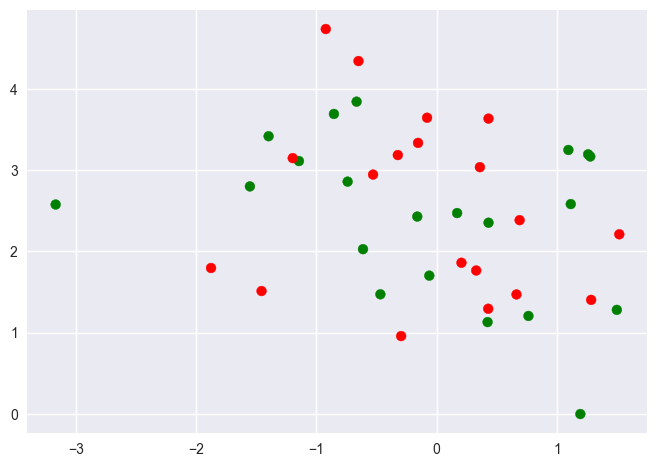

In [54]:
plt.scatter(df_2018['mean_return'], df_2018['volatility'], color = df_2018['labels'], s=50 )
plt.show()

# Applying Logistic regression first

In [55]:
logit_clf = LogisticRegression()
logit_clf.fit(X, Y)

lr_predicted = logit_clf.predict(x_test)
lr_predicted

array(['red', 'red', 'red', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'red', 'green', 'green',
       'green', 'red', 'green', 'green', 'green', 'green', 'green', 'red',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green'], dtype=object)

# Accuracy 

In [56]:
logit_accuracy = accuracy_score(y_truu, lr_predicted)
print("Accuracy of logit:", logit_accuracy*100 )

Accuracy of logit: 41.509433962264154


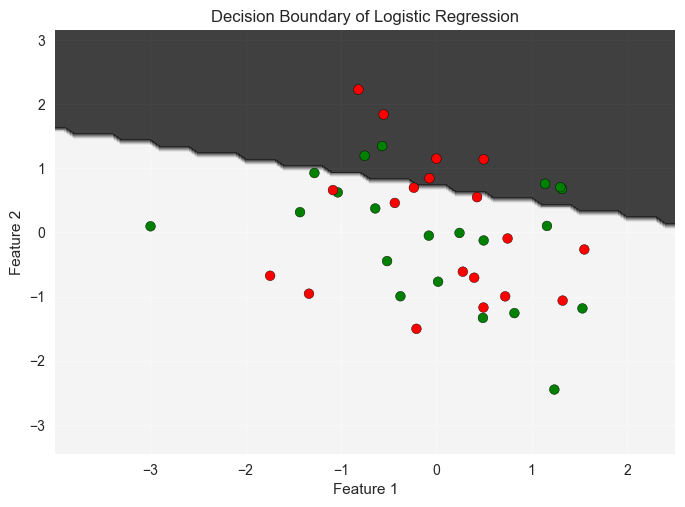

In [57]:
X_train = X
y_train = Y
lr = LogisticRegression()
lr.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
threshold = 0.5
Z_binary = np.where(Z >= threshold, 1, 0)

Z_binary = Z_binary.reshape(xx.shape)
plt.contourf(xx, yy, Z_binary, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')
plt.show()


# Confusion Matrix

In [58]:
cm_lr = confusion_matrix(y_truu, lr_predicted)
print(cm_lr)

[[22  8]
 [23  0]]


# Sensitivity and Specificity

In [59]:
TN_lr = cm_lr[0][0]
FP_lr = cm_lr[0][1]
FN_lr = cm_lr[1][0]
TP_lr = cm_lr[1][1]
TPR_lr = TP_lr/(TP_lr + FN_lr)
print("True positive rate of Logistic Reg:",round(TPR_lr,2))
TNR_lr = TN_lr/(TN_lr + FP_lr)
print("True negative rate of Logistic Reg:",round(TNR_lr,2))

True positive rate of Logistic Reg: 0.0
True negative rate of Logistic Reg: 0.73


# F1 score

In [60]:
lr_f1_score = (2*TP_lr)/ ((2*TP_lr) + FP_lr + FN_lr)
print("F1 Score of Logistic Reg:",round(lr_f1_score,2))

F1 Score of Logistic Reg: 0.0


#### A F1 score of 0 indicates that logistic regression model is not able to correctly classify any positive instances (true positives) and is likely predicting all instances as negative.

In [61]:
df_2019['label_encoding'] = df_2019['labels'].apply(lambda x: 1 if x == 'green' else 0)
y_truu_encoded = df_2019['label_encoding']

# Plotting ROC/AUC 

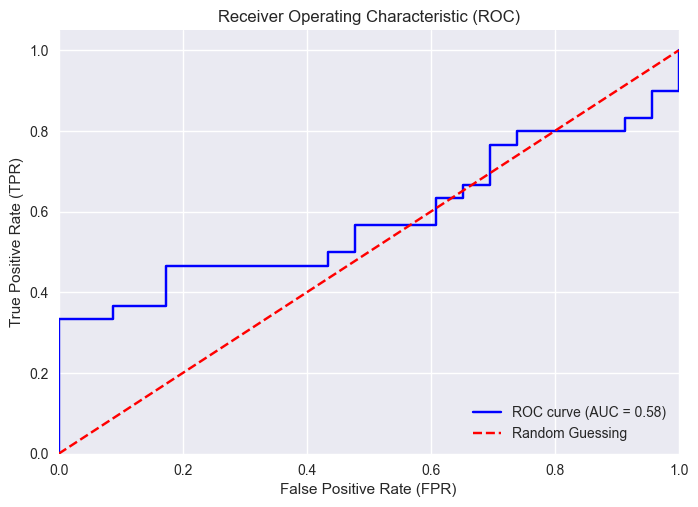

In [62]:
probs = logit_clf.predict_proba(x_test)[:, 1]
fpr, tpr,thresh = roc_curve(y_truu_encoded, probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [63]:
df_2019['lr_pred'] =  pd.Series(lr_predicted)
df_2019

Year  Week_Number  mean_return  volatility labels  label_encoding lr_pred
0   2019            0         1.59        6.54  green               1     red
1   2019            1         0.37        2.77  green               1     red
2   2019            2         2.11        2.39  green               1     red
3   2019            3         0.20        1.69    red               0   green
4   2019            4         0.39        1.74  green               1   green
5   2019            5        -0.34        2.54  green               1   green
6   2019            6         1.97        0.50    red               0   green
7   2019            7         0.45        1.42  green               1   green
8   2019            8        -1.80        1.32  green               1   green
9   2019            9         0.34        2.39    red               0   green
10  2019           10         0.27        2.63  green               1   green
11  2019           11        -0.39        2.27  green               1   green
12  2019           12         0.01        2.98  green               1     red
13  2019           13         0.34        1.63    red               0   green
14  2019           14         0.54        1.46  green               1   green
15  2019           15        -0.90        2.59    red               0   green
16  2019           16        -0.16        3.07  green               1     red
17  2019           17        -0.29        2.09    red               0   green
18  2019           18         0.26        1.69    red               0   green
19  2019           19        -0.73        2.39  green               1   green
20  2019           20        -1.22        2.92  green               1   green
21  2019           21         0.19        1.41  green               1   green
22  2019           22         2.23        2.52  green               1     red
23  2019           23         0.64        1.51  green               1   green
24  2019           24         0.53        2.03    red               0   green
25  2019           25        -0.26        2.42  green               1   green
26  2019           26         0.02        0.65  green               1   green
27  2019           27         0.82        1.65    red               0   green
28  2019           28        -1.09        1.45  green               1   green
29  2019           29         1.52        0.74    red               0   green
30  2019           30        -0.24        0.93  green               1   green
31  2019           31         0.22        2.43    red               0   green
32  2019           32        -0.93        2.31    red               0   green
33  2019           33        -1.34        1.81    red               0   green
34  2019           34        -0.43        2.05  green               1   green
35  2019           35         0.21        1.15    red               0   green
36  2019           36        -0.79        2.24    red               0   green
37  2019           37        -1.56        1.52    red               0   green
38  2019           38        -1.42        2.35    red               0   green
39  2019           39         0.74        1.17  green               1   green
40  2019           40        -0.15        1.61    red               0   green
41  2019           41        -0.01        2.09    red               0   green
42  2019           42         0.92        1.53  green               1   green
43  2019           43         4.20        7.14  green               1     red
44  2019           44         0.16        2.82  green               1     red
45  2019           45        -0.04        0.91    red               0   green
46  2019           46        -0.89        2.68    red               0   green
47  2019           47         0.30        0.91  green               1   green
48  2019           48         0.77        0.47  green               1   green
49  2019           49        -0.12        0.72    red               0   green
50  2019           50     

In [64]:
trading_strategy_df['lr_pred'] =  pd.Series(lr_predicted)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [65]:
trading_strategy_df['labels2'] = trading_strategy_df['lr_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [66]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels2'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels2'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels2'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels2'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels2'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
logit_return =  trading_strategy(trading_strategy_df)
logit_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 112.78373238780601
shares buyed with the total amount which we earned previously=  0.8346931354607466
Total amount earned after selling the previous bought shares is 115.85540974923293
shares buyed with the total amount which we earned previously=  0.8118240088203655
Total amount earned after selling the previous bought shares is 112.23466921941554
shares buyed with the total amount which we earned previously=  0.8332813659888425
Total amount earned after selling the previous bought shares is 116.7260552735008
shares buyed with the total amount which we earned previously=  0.7845547535368278
Total amount earned after selling the previous bought shares is 115.26678295306809
shares buyed with the total amount which we earned previously=  0.8228639452195832
Total amount earned after selling the previous bought shares is 123.05930551877013


123.06

### If we trade with Logit labels we would only earn $123.06

# Applying K- nearest neighbours (kNN)

##### Taking K as odd number because it will classify a new data point based on majority 

In [67]:
Accuracy_Knn = []
for k in range (3 ,12 ,2):
    knn_classifier = KNeighborsClassifier(n_neighbors =k)
    knn_classifier.fit(X, Y)
    acc = knn_classifier.score(X,Y)

    Accuracy_Knn.append(acc)
    
Accuracy_Knn

[0.825, 0.75, 0.7, 0.7, 0.625]

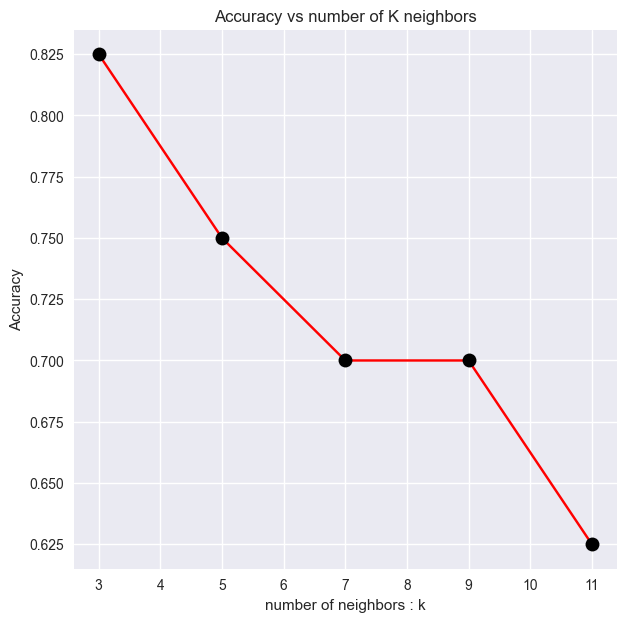

In [68]:
plt.figure(figsize =(7 ,7))
ax = plt.gca()
plt.plot (range (3,12,2) , Accuracy_Knn , color ='red', marker ='o', markerfacecolor ='black', markersize =10)
plt.title ('Accuracy vs number of K neighbors')
plt.xlabel('number of neighbors : k')
plt.ylabel('Accuracy')
plt.show()

## The optimal k to choose is 3 cause we are getting high accuracy on that

In [69]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X,Y)
pred_knn = knn_classifier.predict(x_test)
print(pred_knn)
accuracy_knn = accuracy_score(y_truu, pred_knn)
print("Accuracy of kNN with k=3 :", accuracy_knn*100 )

['red' 'red' 'green' 'green' 'green' 'red' 'green' 'red' 'red' 'green'
 'red' 'green' 'red' 'green' 'red' 'green' 'red' 'green' 'green' 'green'
 'green' 'red' 'green' 'red' 'green' 'red' 'green' 'green' 'red' 'green'
 'green' 'red' 'green' 'red' 'green' 'red' 'green' 'red' 'green' 'red'
 'green' 'green' 'red' 'green' 'red' 'green' 'green' 'red' 'green' 'green'
 'red' 'green' 'red']
Accuracy of kNN with k=3 : 32.075471698113205


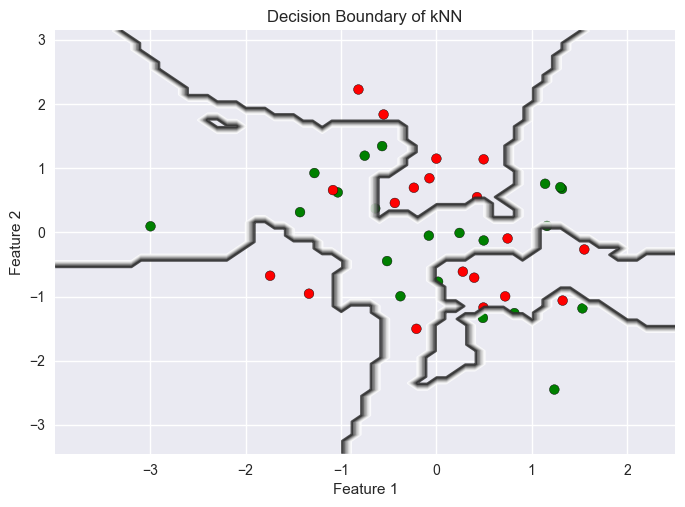

In [70]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of kNN')
plt.show()


In [71]:
cm_knn = confusion_matrix(y_truu, pred_knn)
print(cm_knn)

[[12 18]
 [18  5]]


In [72]:
TN_knn = cm_knn[0][0]
FP_knn = cm_knn[0][1]
FN_knn = cm_knn[1][0]
TP_knn = cm_knn[1][1]
TPR_knn = TP_knn/(TP_knn + FN_knn)
print("True positive rate of K nearest neighbour:",round(TPR_knn,2))
TNR_knn = TN_knn/(TN_knn + FP_knn)
print("True negative rate of K nearest neighbour:",round(TNR_knn,2))

True positive rate of K nearest neighbour: 0.22
True negative rate of K nearest neighbour: 0.4


In [73]:
knn_f1_score = (2*TP_knn)/ ((2*TP_knn) + FP_knn + FN_knn)
print("F1 Score of K nearest neighbour with k=3:",round(knn_f1_score,2))

F1 Score of K nearest neighbour with k=3: 0.22


In [74]:
trading_strategy_df['knn_pred'] =  pd.Series(pred_knn)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [75]:
trading_strategy_df['labels3'] = trading_strategy_df['knn_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [76]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels3'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels3'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels3'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels3'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels3'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
knn_return = trading_strategy(trading_strategy_df)
knn_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 113.66973612827579
shares buyed with the total amount which we earned previously=  0.7628841350890992
Total amount earned after selling the previous bought shares is 115.34045424663101
shares buyed with the total amount which we earned previously=  0.8144937063025458
Total amount earned after selling the previous bought shares is 115.58480484415931
shares buyed with the total amount which we earned previously=  0.8524582046312743
Total amount earned after selling the previous bought shares is 118.32120140431687
shares buyed with the total amount which we earned previously=  0.8291023462815068
Total amount earned after selling the previous bought shares is 120.17838256328486
shares buyed with the total amount which we earned previously=  0.8968536012185437
Total amount earned after selling the previous bought shares is 123.99001036846367
shares buyed with the total amoun

117.13

# Applying Gaussian Naive Bayesian

In [77]:
NB_classifier = GaussianNB().fit(X, Y)
nb_prediction = NB_classifier.predict(x_test)
nb_prediction

array(['red', 'red', 'green', 'red', 'red', 'red', 'green', 'red',
       'green', 'red', 'red', 'red', 'red', 'red', 'green', 'green',
       'red', 'red', 'red', 'green', 'green', 'red', 'green', 'green',
       'red', 'red', 'red', 'green', 'green', 'green', 'green', 'red',
       'green', 'green', 'red', 'red', 'green', 'green', 'green', 'green',
       'red', 'red', 'green', 'green', 'red', 'red', 'green', 'red',
       'green', 'red', 'red', 'red', 'green'], dtype='<U5')

In [78]:
nb_acc = accuracy_score(y_truu, nb_prediction)
print("Accuracy of Naive Bayesian:", nb_acc*100 )

Accuracy of Naive Bayesian: 47.16981132075472


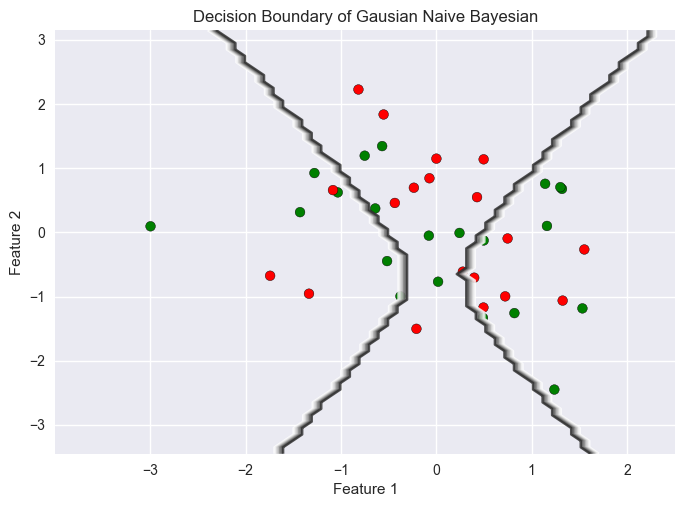

In [79]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

NB_classifier = GaussianNB().fit(X_train, y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = NB_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Gausian Naive Bayesian')
plt.show()

In [80]:
cm_gnb = confusion_matrix(y_truu, nb_prediction)
print(cm_gnb)

[[13 17]
 [11 12]]


In [81]:
TN_gnb = cm_gnb[0][0]
FP_gnb = cm_gnb[0][1]
FN_gnb = cm_gnb[1][0]
TP_gnb = cm_gnb[1][1]
TPR_gnb = TP_gnb/(TP_gnb + FN_gnb)
print("True positive rate of Gausian naive bayesian:",round(TPR_gnb,2))
TNR_gnb = TN_gnb/(TN_gnb + FP_gnb)
print("True negative rate of Gausian naive bayesian:",round(TNR_gnb,2))

True positive rate of Gausian naive bayesian: 0.52
True negative rate of Gausian naive bayesian: 0.43


In [82]:
gnb_f1_score = (2*TP_gnb)/ ((2*TP_gnb) + FP_gnb + FN_gnb)
print("F1 Score of Gausian naive bayesian:",round(gnb_f1_score,2))

F1 Score of Gausian naive bayesian: 0.46


In [83]:
trading_strategy_df['gnb_pred'] =  pd.Series(nb_prediction)
trading_strategy_df['labels4'] = trading_strategy_df['gnb_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [84]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels4'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels4'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels4'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels4'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels4'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
GNB_return = trading_strategy(trading_strategy_df)
GNB_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 113.63597649263265
shares buyed with the total amount which we earned previously=  0.7626575603532393
Total amount earned after selling the previous bought shares is 115.30619841176318
shares buyed with the total amount which we earned previously=  0.8331974775656229
Total amount earned after selling the previous bought shares is 116.79761630262843
shares buyed with the total amount which we earned previously=  0.849684348886662
Total amount earned after selling the previous bought shares is 117.46886123358102
shares buyed with the total amount which we earned previously=  0.9558084603346871
Total amount earned after selling the previous bought shares is 120.03042819896756
shares buyed with the total amount which we earned previously=  0.833544640270608
Total amount earned after selling the previous bought shares is 123.62300356351278
shares buyed with the total amount 

121.43

# Implementing Student-t Naive Bayesian classifier with (df = 0.5,1,5)

In [85]:
accuracies = {}
df  = [0.5,1,5]
df_fit, loc, scale = t.fit(X)

for i in df:
    
    t_data1 = t.pdf(X, i, loc, scale) # Probability density function
    NB_classifier = GaussianNB().fit(t_data1, Y)
    y_pred = NB_classifier.predict(x_test)
    #print(y_pred)
    accuracy = accuracy_score(y_truu, y_pred)
    accuracies[i] = round(accuracy*100,2)
    print("Accuracy for df =",i,"is:",round(accuracy*100,2))

    
    conf_mat = confusion_matrix(y_truu, y_pred)
    
    print("Confusion Matrix for df =",i,"is:\n",conf_mat)
    TP = conf_mat[0][0]
    FN = conf_mat[0][1]
    FP = conf_mat[1][0]
    TN = conf_mat[1][1]
    TPR = round(TP/(TP+FN),2)
    TNR = round(TN/(TN + FP),2)
    
    print("True Positive Rate for df =",i,"is:",round(TPR*100,2))
    print("True Negative Rate for df =",i,"is:",round(TNR*100,2),"\n\n")

Accuracy for df = 0.5 is: 58.49
Confusion Matrix for df = 0.5 is:
 [[30  0]
 [22  1]]
True Positive Rate for df = 0.5 is: 100.0
True Negative Rate for df = 0.5 is: 4.0 


Accuracy for df = 1 is: 58.49
Confusion Matrix for df = 1 is:
 [[30  0]
 [22  1]]
True Positive Rate for df = 1 is: 100.0
True Negative Rate for df = 1 is: 4.0 


Accuracy for df = 5 is: 58.49
Confusion Matrix for df = 5 is:
 [[30  0]
 [22  1]]
True Positive Rate for df = 5 is: 100.0
True Negative Rate for df = 5 is: 4.0 




In [86]:
best_df = max(accuracies, key=accuracies.get)
print(best_df)

0.5


# using best degree of freedom (df)

In [87]:
t_data1 = t.pdf(X, best_df, loc, scale)
NB_classifier = GaussianNB().fit(t_data1, Y)
y_pred = NB_classifier.predict(x_test)
t_nb_accuracy = accuracy_score(y_truu, y_pred)
print(y_pred)
print("Accuracy of Student-t Naive Bayesian:", t_nb_accuracy*100 )

['green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'red' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green']
Accuracy of Student-t Naive Bayesian: 58.490566037735846


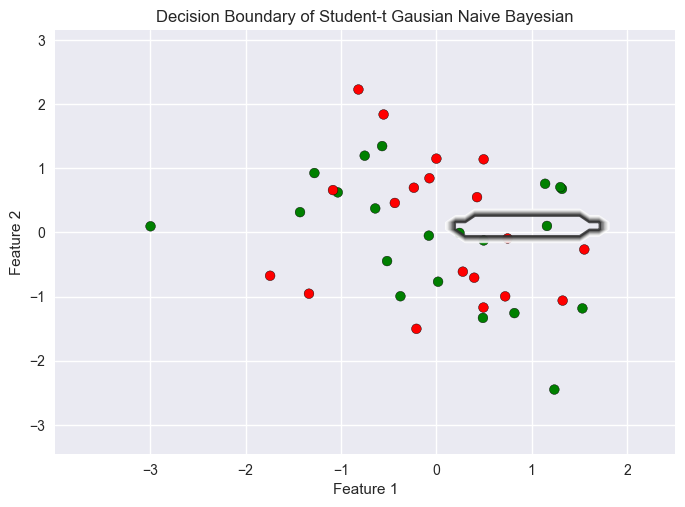

In [88]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)
t_data1 = t.pdf(X, best_df, loc, scale)
NB_classifier = GaussianNB().fit(t_data1, y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = NB_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Student-t Gausian Naive Bayesian')
plt.show()

In [89]:
trading_strategy_df['t_gnb_pred'] =  pd.Series(y_pred)
trading_strategy_df['labels5'] = trading_strategy_df['t_gnb_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [90]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels5'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels5'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels5'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels5'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels5'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
Student_t_GNB_return = trading_strategy(trading_strategy_df)
Student_t_GNB_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 125.14555302100777
shares buyed with the total amount which we earned previously=  0.8599886568632479
Total amount earned after selling the previous bought shares is 128.61130625837583


128.61

# Applying LDA (linear discriminant analysis) 

In [91]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)

predicted_lda = lda.predict(x_test)
print(predicted_lda,'\n')
print(f"Weight vector: {lda.coef_}")
print(f"Bias term: {lda.intercept_}")


['red' 'red' 'red' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'red' 'green' 'green' 'green' 'red' 'green' 'green'
 'green' 'green' 'green' 'red' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'red' 'red' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green'] 

Weight vector: [[0.03970534 0.15646596]]
Bias term: [-0.10066985]


In [92]:
accuracy_lda = accuracy_score(y_truu, predicted_lda)
print("Accuracy for LinearDiscriminant Classifier ",accuracy_lda)

Accuracy for LinearDiscriminant Classifier  0.41509433962264153


In [93]:
cm_lda = confusion_matrix(y_truu, predicted_lda)
print(cm_lda)

[[22  8]
 [23  0]]


In [94]:
TN_lda = cm_lda[0][0]
FP_lda = cm_lda[0][1]
FN_lda = cm_lda[1][0]
TP_lda = cm_lda[1][1]
TPR_lda = TP_lda/(TP_lda + FN_lda)
print("True positive rate of LDA:",round(TPR_lda,2))
TNR_knn = TN_lda/(TN_lda + FP_lda)
print("True negative rate of LDA:",round(TNR_knn,2))

True positive rate of LDA: 0.0
True negative rate of LDA: 0.73


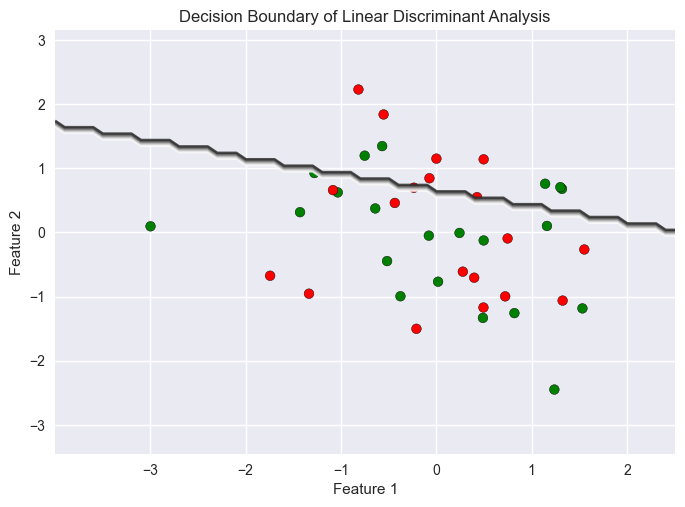

In [95]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Linear Discriminant Analysis')
plt.show()

In [96]:
trading_strategy_df['lda_pred'] =  pd.Series(predicted_lda)
trading_strategy_df['labels6'] = trading_strategy_df['lda_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [97]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels6'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels6'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels6'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels6'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels6'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
LDA_return = trading_strategy(trading_strategy_df)
LDA_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 112.78373238780601
shares buyed with the total amount which we earned previously=  0.8346931354607466
Total amount earned after selling the previous bought shares is 115.85540974923293
shares buyed with the total amount which we earned previously=  0.8118240088203655
Total amount earned after selling the previous bought shares is 112.23466921941554
shares buyed with the total amount which we earned previously=  0.8332813659888425
Total amount earned after selling the previous bought shares is 116.7260552735008
shares buyed with the total amount which we earned previously=  0.7845547535368278
Total amount earned after selling the previous bought shares is 115.26678295306809
shares buyed with the total amount which we earned previously=  0.8228639452195832
Total amount earned after selling the previous bought shares is 123.05930551877013


123.06

# Applying QDA (Quadratic discriminant analysis)

In [98]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, Y)

predicted_qda = qda.predict(x_test)
print(predicted_qda)

['red' 'red' 'green' 'red' 'red' 'red' 'green' 'green' 'green' 'red' 'red'
 'green' 'red' 'red' 'green' 'green' 'red' 'green' 'red' 'green' 'green'
 'red' 'green' 'green' 'red' 'red' 'red' 'green' 'green' 'green' 'green'
 'red' 'green' 'green' 'green' 'red' 'green' 'green' 'green' 'green'
 'green' 'red' 'green' 'red' 'red' 'red' 'green' 'red' 'green' 'red'
 'green' 'red' 'green']


In [99]:
accuracy_qda = accuracy_score(y_truu, predicted_qda)
print("Accuracy for Quadratic Discriminant Classifier: ",accuracy_qda)

Accuracy for Quadratic Discriminant Classifier:  0.49056603773584906


In [100]:
cm_qda = confusion_matrix(y_truu, predicted_qda)
print(cm_qda)

[[16 14]
 [13 10]]


In [101]:
TN_qda = cm_qda[0][0]
FP_qda = cm_qda[0][1]
FN_qda = cm_qda[1][0]
TP_qda = cm_qda[1][1]
TPR_qda = TP_qda/(TP_qda + FN_qda)
print("True positive rate of QDA:",round(TPR_qda,2))
TNR_qda = TN_qda/(TN_qda + FP_qda)
print("True negative rate of QDA:",round(TNR_qda,2))

True positive rate of QDA: 0.43
True negative rate of QDA: 0.53


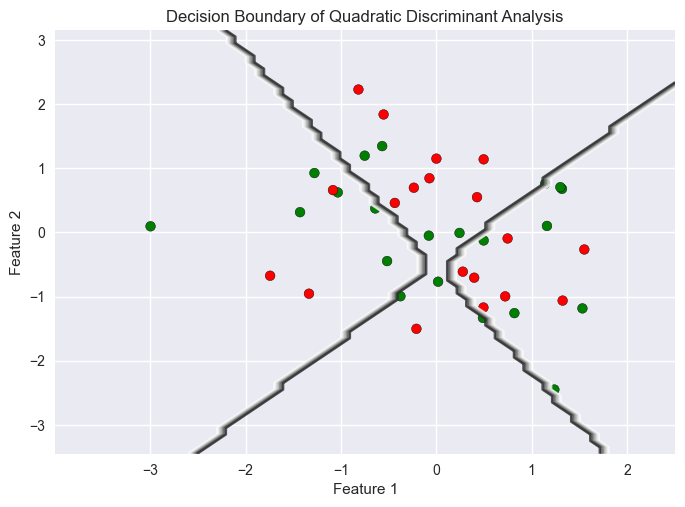

In [102]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Quadratic Discriminant Analysis')
plt.show()

In [103]:
trading_strategy_df['qda_pred'] =  pd.Series(predicted_qda)
trading_strategy_df['labels7'] = trading_strategy_df['qda_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [104]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels7'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels7'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels7'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels7'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels7'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
QDA_return = trading_strategy(trading_strategy_df)
QDA_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 113.63597649263265
shares buyed with the total amount which we earned previously=  0.7626575603532393
Total amount earned after selling the previous bought shares is 106.90933122444628
shares buyed with the total amount which we earned previously=  0.7884750653582727
Total amount earned after selling the previous bought shares is 109.44034147796319
shares buyed with the total amount which we earned previously=  0.7961613278964191
Total amount earned after selling the previous bought shares is 110.06930358167995
shares buyed with the total amount which we earned previously=  0.8172047040355727
Total amount earned after selling the previous bought shares is 112.65167343912537
shares buyed with the total amount which we earned previously=  0.9166124657484601
Total amount earned after selling the previous bought shares is 115.10819512705916
shares buyed with the total amoun

116.93

# Applying Decision Tree Classifier

In [105]:
clf = tree.DecisionTreeClassifier( criterion = 'entropy')
clf = clf.fit(X,Y)
tree_prediction = clf.predict(x_test)
tree_prediction

array(['red', 'green', 'red', 'green', 'green', 'red', 'green', 'red',
       'green', 'green', 'green', 'green', 'red', 'green', 'red', 'green',
       'red', 'red', 'green', 'green', 'red', 'green', 'red', 'red',
       'red', 'red', 'green', 'red', 'green', 'red', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green',
       'green', 'green', 'red', 'red', 'green', 'green'], dtype=object)

In [106]:
accuracy_decisiontree = accuracy_score(y_truu, tree_prediction)
print("Accuracy for Decision Tree Classifier: ",accuracy_decisiontree*100)

Accuracy for Decision Tree Classifier:  43.39622641509434


In [107]:
cm_tree = confusion_matrix(y_truu, tree_prediction)
print(cm_tree)

[[16 14]
 [16  7]]


In [108]:
TN_tree = cm_tree[0][0]
FP_tree = cm_tree[0][1]
FN_tree = cm_tree[1][0]
TP_tree = cm_tree[1][1]
TPR_tree = TP_tree/(TP_tree + FN_tree)
print("True positive rate of Decision Tree:",round(TPR_tree,2))
TNR_tree = TN_tree/(TN_tree + FP_tree)
print("True negative rate of Decision Tree:",round(TNR_tree,2))

True positive rate of Decision Tree: 0.3
True negative rate of Decision Tree: 0.53


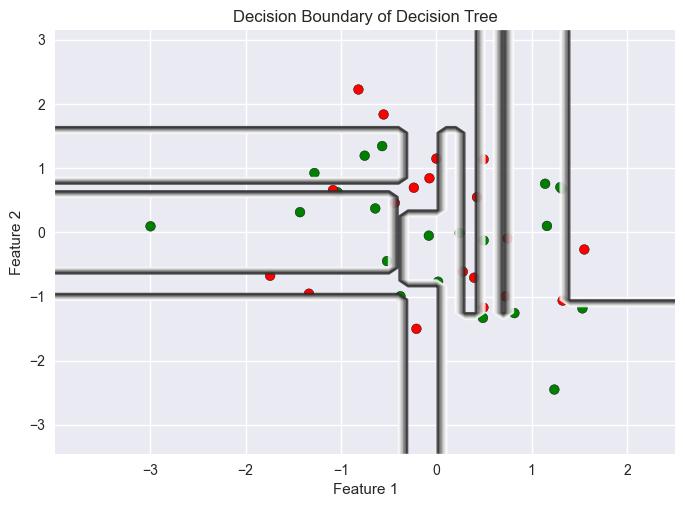

In [109]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X,y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Decision Tree')
plt.show()

In [110]:
trading_strategy_df['Tree_pred'] =  pd.Series(tree_prediction)
trading_strategy_df['labels8'] = trading_strategy_df['Tree_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [111]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels8'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels8'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels8'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels8'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels8'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
DecisionTree_return = trading_strategy(trading_strategy_df)
DecisionTree_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 112.78373238780601
shares buyed with the total amount which we earned previously=  0.8346931354607466
Total amount earned after selling the previous bought shares is 112.44151788193604
shares buyed with the total amount which we earned previously=  0.7546410596103089
Total amount earned after selling the previous bought shares is 114.09418364486801
shares buyed with the total amount which we earned previously=  0.8244395125953172
Total amount earned after selling the previous bought shares is 114.43220686421975
shares buyed with the total amount which we earned previously=  0.8018513172216137
Total amount earned after selling the previous bought shares is 116.22834598421689
shares buyed with the total amount which we earned previously=  0.867375716300126
Total amount earned after selling the previous bought shares is 119.91469277849242
shares buyed with the total amount

90.56

# Now will start building Ensemble methods 
## In ML Ensemble mean to combine multiple models to make more accurate predictions or classifications than any single model (which we were doing above). The idea behind ensemble is to build strong model with combined models to improve the overall significance and reduce the risk of overfitting. 



## There are 2 main types of ENSEMBLE methods:
## 1) Bagging (Bootstrap Aggregrating): It involves creating multiple subsets of the original dataset through bootstrap sampling and train parallely on those subsets of data and then their prediction are aggregrated (majority for classification or averaging for regression) to make final predictions. Example:- Random Forest (train multiple decision tree parallely) 

## 2) Boosting: It is a technique where each model are trained sequentially and learn from the errors of the previous model and improve it during next iteration. The models are trained iteratively, with each new model giving more attention (weights) to the misclassified instances from previous models. The final prediction is a weighted combination of the predictions from all the individual models. Examples of boosting algorithms include AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), and Extreme Boosting (XGBoost).


## There is one more method which falls under Ensemble which is STACKING. 
## It combines multiple individual models using a meta-model to make predictions or classifications. It involves training several base models on the same dataset, using different algorithms or configurations, and then using a meta-model to learn how to combine the predictions of the base models.

# Applying Random Forest Classifier

In [112]:
forest_clf = RandomForestClassifier( criterion='entropy', random_state=42)
forest_clf.fit(X, Y)
forest_pred = forest_clf.predict(x_test)

In [113]:
accuracy_forest = accuracy_score(y_truu, forest_pred)
print("Accuracy for Random Forest Classifier: ",accuracy_forest*100)

Accuracy for Random Forest Classifier:  33.9622641509434


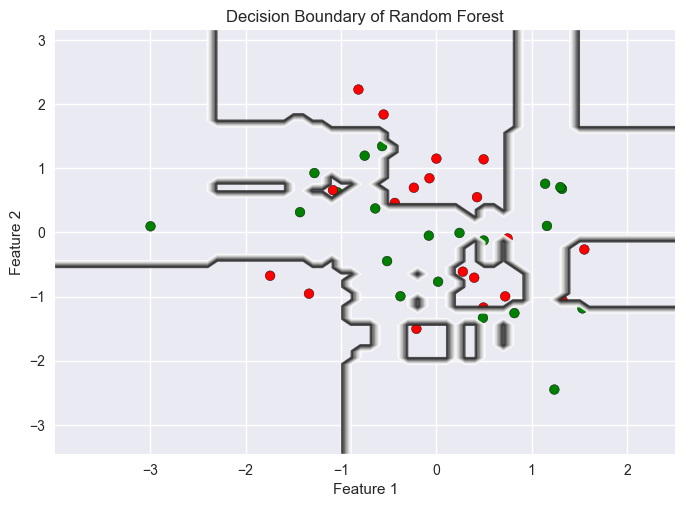

In [114]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

forest_clf = RandomForestClassifier( criterion='entropy', random_state=42)
forest_clf.fit(X, y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = forest_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Random Forest')
plt.show()

## Power of Ensemble method. which completely separated the red and green labels. But here It's completely a overfitting case as the accuracy which achieved on test data is only33.9%. So we need to set the number of tree and maximum depth of the tree to overcome from overfitting case

{(1, 1): 0.4716981132075472, (1, 2): 0.4716981132075472, (1, 3): 0.5660377358490566, (1, 4): 0.6037735849056604, (1, 5): 0.5283018867924528, (3, 1): 0.6415094339622642, (3, 2): 0.6415094339622642, (3, 3): 0.5849056603773585, (3, 4): 0.679245283018868, (3, 5): 0.6981132075471699, (5, 1): 0.6037735849056604, (5, 2): 0.6415094339622642, (5, 3): 0.6226415094339622, (5, 4): 0.6415094339622642, (5, 5): 0.6603773584905661, (7, 1): 0.6037735849056604, (7, 2): 0.5660377358490566, (7, 3): 0.5283018867924528, (7, 4): 0.5849056603773585, (7, 5): 0.6037735849056604, (9, 1): 0.6226415094339622, (9, 2): 0.6415094339622642, (9, 3): 0.5660377358490566, (9, 4): 0.6226415094339622, (9, 5): 0.5849056603773585}


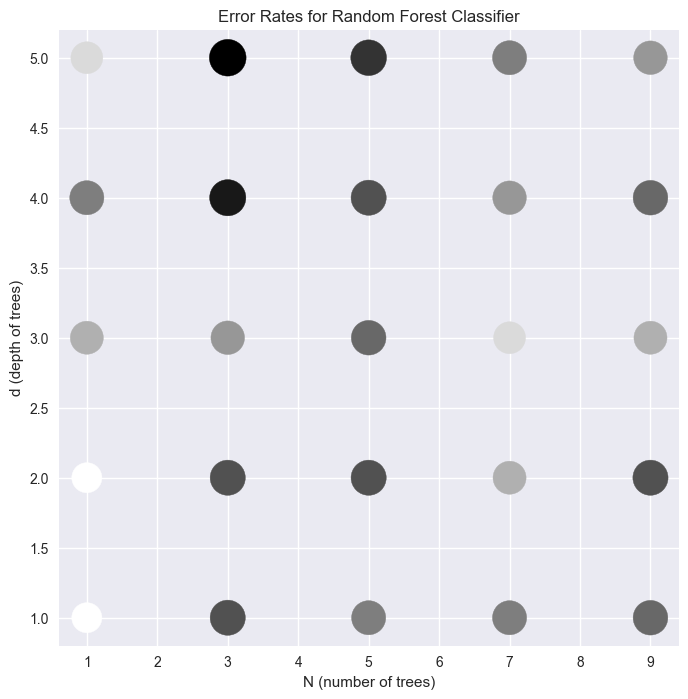

Best combination of N and d: (1, 1), Error rate: 0.4716981132075472


In [115]:
error_rates = {}
plt.figure(figsize=(8,8))
for N in range(1, 11, 2):
    for d in range(1, 6):
        forest_clf = RandomForestClassifier(n_estimators=N, max_depth=d, random_state=42)
        forest_clf.fit(X, Y)
        y_pred2 = forest_clf.predict(x_test)

        error_rate = 1 - accuracy_score(y_truu, y_pred2)
        error_rates[(N, d)] = error_rate


print(error_rates)
error_rates_list = [(n,d,err) for (n,d),err in error_rates.items()]
plt.scatter([n for n,d,err in error_rates_list], [d for n,d,err in error_rates_list] , 
            c=[err for n,d,err in error_rates_list], s=[1000*err for n,d,err in error_rates_list])
plt.xlabel('N (number of trees)')
plt.ylabel('d (depth of trees)')
plt.title('Error Rates for Random Forest Classifier')
plt.show()

best_N, best_d = min(error_rates, key=error_rates.get)
print(f"Best combination of N and d: ({best_N}, {best_d}), Error rate: {error_rates[(best_N, best_d)]}")

In [116]:
optimal_forest = RandomForestClassifier(n_estimators=1, max_depth=1, random_state=42)
optimal_forest.fit(X, Y)
y_pred3 = optimal_forest.predict(x_test)
print(y_pred3)
optimal_forest_acc = accuracy_score(y_truu, y_pred3)
print("The accuracy of year 2 with the optimal values from year 1 is:", optimal_forest_acc*100)

['red' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'red' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green']
The accuracy of year 2 with the optimal values from year 1 is: 52.83018867924528


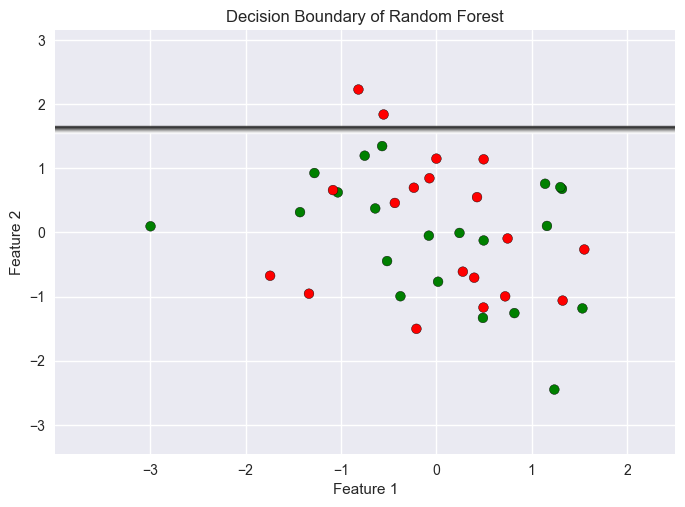

In [117]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

optimal_forest = RandomForestClassifier(n_estimators=1, max_depth=1, random_state=42)
optimal_forest.fit(X, y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = optimal_forest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Random Forest')
plt.show()

In [118]:
cm_forest = confusion_matrix(y_truu, y_pred3)
print(cm_forest)

[[28  2]
 [23  0]]


In [119]:
TN_forest = cm_forest[0][0]
FP_forest = cm_forest[0][1]
FN_forest = cm_forest[1][0]
TP_forest = cm_forest[1][1]
TPR_forest = TP_forest/(TP_forest + FN_forest)
print("True positive rate of Random Forest",round(TPR_forest,2))
TNR_forest = TN_forest/(TN_forest + FP_forest)
print("True negative rate of Random Forest:",round(TNR_forest,2))

True positive rate of Random Forest 0.0
True negative rate of Random Forest: 0.93


In [120]:
trading_strategy_df['forest_pred'] =  pd.Series(y_pred3)
trading_strategy_df['labels9'] = trading_strategy_df['forest_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [121]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels9'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels9'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels9'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels9'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels9'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
RandomForest_return = trading_strategy(trading_strategy_df)
RandomForest_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 123.97265675521359
shares buyed with the total amount which we earned previously=  0.8338781077694896
Total amount earned after selling the previous bought shares is 124.7064735617212


124.71

# Applying BOOSTING : 1) Adaboost

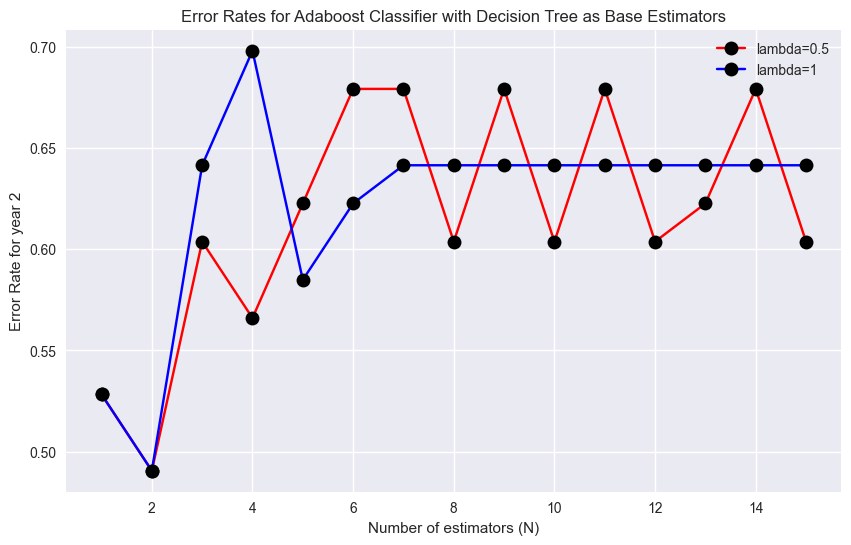

[0.5283018867924528, 0.49056603773584906, 0.6037735849056604, 0.5660377358490566, 0.6226415094339622, 0.679245283018868, 0.679245283018868, 0.6037735849056604, 0.679245283018868, 0.6037735849056604, 0.679245283018868, 0.6037735849056604, 0.6226415094339622, 0.679245283018868, 0.6037735849056604] 

[0.5283018867924528, 0.49056603773584906, 0.6415094339622642, 0.6981132075471699, 0.5849056603773585, 0.6226415094339622, 0.6415094339622642, 0.6415094339622642, 0.6415094339622642, 0.6415094339622642, 0.6415094339622642, 0.6415094339622642, 0.6415094339622642, 0.6415094339622642, 0.6415094339622642]


In [122]:
lambda_vals = [0.5, 1]
base_estimators = tree.DecisionTreeClassifier( criterion = 'entropy', max_depth=5)

N_vals = range(1, 16)

error_rates_lambda05 = []
error_rates_lambda1 = []

for lam in lambda_vals:
    error_rates = []
    np.random.seed(20)
    
    for N in N_vals:
        ada_clf = AdaBoostClassifier(base_estimator=base_estimators,n_estimators=N,learning_rate=lam)
        ada_clf.fit(X, Y)
            
        y_pred = ada_clf.predict(x_test)
            
        error_rate = 1 - accuracy_score(y_truu, y_pred)        
        if lam == 0.5:
            error_rates_lambda05.append(error_rate)
        elif lam == 1:
            error_rates_lambda1.append(error_rate)
            
plt.figure(figsize=(10, 6))
plt.title('Error Rates for Adaboost Classifier with Decision Tree as Base Estimators')
plt.xlabel('Number of estimators (N)')
plt.ylabel('Error Rate for year 2')
plt.plot (range(1, 16) , error_rates_lambda05 , color ='red', marker ='o', markerfacecolor ='black', markersize =10, label='lambda=0.5')
plt.plot (range(1, 16) , error_rates_lambda1 , color ='blue', marker ='o', markerfacecolor ='black', markersize =10, label='lambda=1')
    
plt.legend()
plt.show()

print(error_rates_lambda05,"\n") 
print(error_rates_lambda1 )


In [123]:
ada_clf = AdaBoostClassifier(base_estimator=base_estimators,n_estimators=2,learning_rate=0.5)
ada_clf.fit(X, Y)
y_pred_ada = ada_clf.predict(x_test)
y_pred_ada

array(['green', 'green', 'green', 'green', 'green', 'red', 'green',
       'green', 'red', 'green', 'green', 'green', 'red', 'green', 'green',
       'green', 'red', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'red', 'red', 'green', 'red',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'red', 'green',
       'green', 'red', 'green', 'green', 'green', 'red', 'red', 'green',
       'green'], dtype=object)

In [124]:
ada_accuracy = accuracy_score(y_truu, y_pred_ada)
print("Accuracy of Adaboost clf:", ada_accuracy*100 )

Accuracy of Adaboost clf: 50.943396226415096


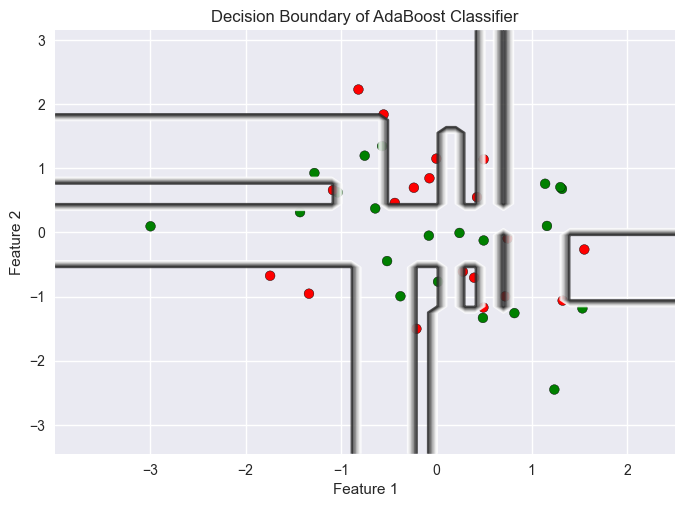

In [125]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

ada_clf = AdaBoostClassifier(base_estimator=base_estimators,n_estimators=2,learning_rate=0.5)
ada_clf.fit(X, y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = ada_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of AdaBoost Classifier')
plt.show()

In [126]:
cm_adaboost = confusion_matrix(y_truu, y_pred_ada)
print(cm_adaboost)

[[23  7]
 [19  4]]


In [127]:
TN_adaboost = cm_adaboost[0][0]
FP_adaboost = cm_adaboost[0][1]
FN_adaboost = cm_adaboost[1][0]
TP_adaboost = cm_adaboost[1][1]
TPR_adaboost = TP_adaboost/(TP_adaboost + FN_adaboost)
print("True positive rate of Adaboost:",round(TPR_adaboost,2))
TNR_adaboost = TN_adaboost/(TN_adaboost + FP_adaboost)
print("True negative rate of Adaboost:",round(TNR_adaboost,2))

True positive rate of Adaboost: 0.17
True negative rate of Adaboost: 0.77


In [128]:
trading_strategy_df['ada_pred'] =  pd.Series(y_pred_ada)
trading_strategy_df['labels10'] = trading_strategy_df['ada_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [129]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels10'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels10'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels10'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels10'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels10'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
Adaboost_return = trading_strategy(trading_strategy_df)
Adaboost_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 113.66973612827579
shares buyed with the total amount which we earned previously=  0.7628841350890992
Total amount earned after selling the previous bought shares is 105.2780106422957
shares buyed with the total amount which we earned previously=  0.7434362699564876
Total amount earned after selling the previous bought shares is 103.18895653874792
shares buyed with the total amount which we earned previously=  0.723067421233055
Total amount earned after selling the previous bought shares is 99.96407098546986
shares buyed with the total amount which we earned previously=  0.74217884901262
Total amount earned after selling the previous bought shares is 108.58818558707635
shares buyed with the total amount which we earned previously=  0.7076915006472491
Total amount earned after selling the previous bought shares is 109.96110882609446
shares buyed with the total amount whi

87.78

# 2) Gradient Boosting Classifier

In [130]:
gb_classifier = GradientBoostingClassifier(n_estimators=1, learning_rate=0.1,max_depth = 2, random_state=42, verbose =1)
gb_classifier.fit(X,Y)

GB_pred = gb_classifier.predict(x_test)
GB_pred

      Iter       Train Loss   Remaining Time 
         1           1.3400            0.00s


array(['green', 'green', 'green', 'green', 'green', 'green', 'green',
       'red', 'green', 'green', 'green', 'green', 'green', 'green', 'red',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'red', 'red', 'green', 'green', 'red', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'red', 'green', 'green', 'red', 'green', 'green',
       'green', 'green', 'green', 'red', 'green', 'red', 'red', 'green'],
      dtype=object)

In [131]:
gb_accuracy = accuracy_score(y_truu, GB_pred)
print("Accuracy of Gradient Boosting clf:", gb_accuracy*100 )

Accuracy of Gradient Boosting clf: 45.28301886792453


In [132]:
cm_gboost = confusion_matrix(y_truu, GB_pred)
print(cm_gboost)

[[22  8]
 [21  2]]


In [133]:
TN_gboost = cm_gboost[0][0]
FP_gboost = cm_gboost[0][1]
FN_gboost = cm_gboost[1][0]
TP_gboost = cm_gboost[1][1]
TPR_gboost = TP_gboost/(TP_gboost + FN_gboost)
print("True positive rate of Gradient Boosting:",round(TPR_gboost,2))
TNR_gboost = TN_gboost/(TN_gboost + FP_gboost)
print("True negative rate of Gradient Boosting:",round(TNR_gboost,2))

True positive rate of Gradient Boosting: 0.09
True negative rate of Gradient Boosting: 0.73


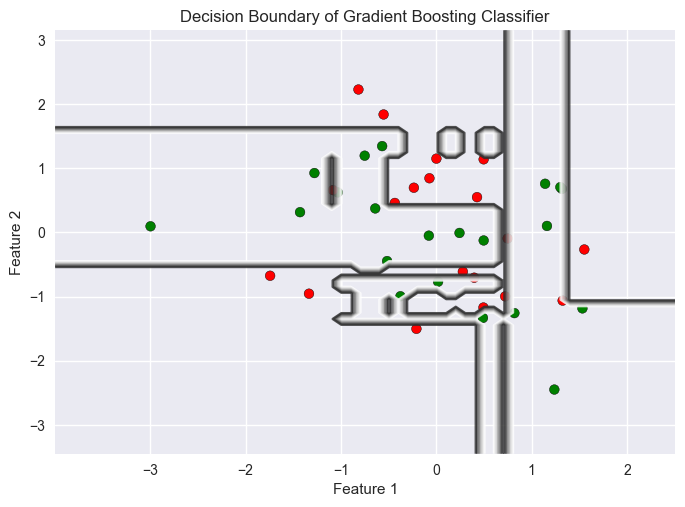

In [134]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42,  verbose =0)
gb_classifier.fit(X,y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = gb_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Gradient Boosting Classifier')
plt.show()

In [135]:
trading_strategy_df['Gboost_pred'] =  pd.Series(GB_pred)
trading_strategy_df['labels11'] = trading_strategy_df['Gboost_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [136]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels11'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels11'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels11'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels11'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels11'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
Gradientboost_return  = trading_strategy(trading_strategy_df)
Gradientboost_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 127.57573176617551
shares buyed with the total amount which we earned previously=  0.9218565816087297
Total amount earned after selling the previous bought shares is 133.62310869090234
shares buyed with the total amount which we earned previously=  0.997187378290316
Total amount earned after selling the previous bought shares is 144.18331937518755
shares buyed with the total amount which we earned previously=  0.9908144251097555
Total amount earned after selling the previous bought shares is 150.90103996794141
shares buyed with the total amount which we earned previously=  0.9834530602641617
Total amount earned after selling the previous bought shares is 114.49360347519738
shares buyed with the total amount which we earned previously=  0.9710253576388458
Total amount earned after selling the previous bought shares is 117.19305278409966
shares buyed with the total amount

117.02

# 3) XGBoost Classifier

In [137]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)
y_encoded = np.abs(y_encoded - 1)
y_encoded

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [138]:
# df_2019['label_encoding'] = df_2019['labels'].apply(lambda x: 1 if x == 'green' else 0)
# y_truu_encoded = df_2019['label_encoding']

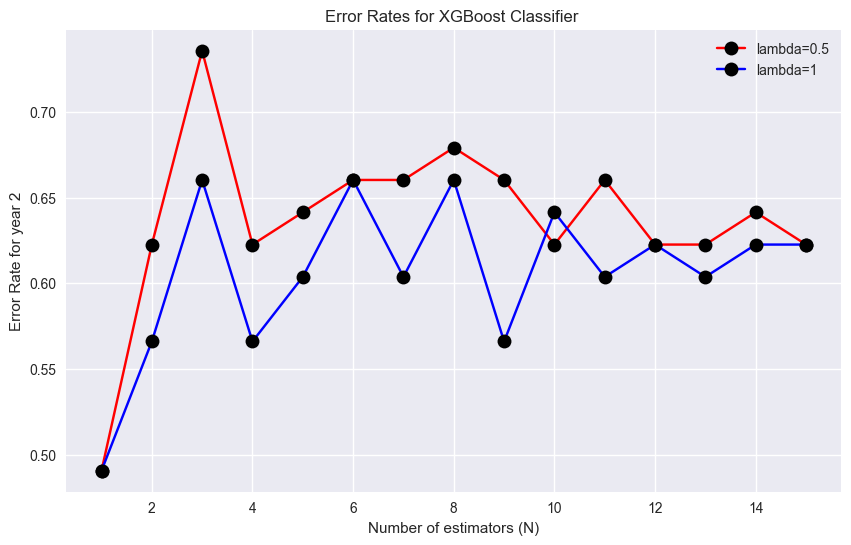

[0.49056603773584906, 0.6226415094339622, 0.7358490566037736, 0.6226415094339622, 0.6415094339622642, 0.6603773584905661, 0.6603773584905661, 0.679245283018868, 0.6603773584905661, 0.6226415094339622, 0.6603773584905661, 0.6226415094339622, 0.6226415094339622, 0.6415094339622642, 0.6226415094339622] 

[0.49056603773584906, 0.5660377358490566, 0.6603773584905661, 0.5660377358490566, 0.6037735849056604, 0.6603773584905661, 0.6037735849056604, 0.6603773584905661, 0.5660377358490566, 0.6415094339622642, 0.6037735849056604, 0.6226415094339622, 0.6037735849056604, 0.6226415094339622, 0.6226415094339622]


In [139]:
lambda_vals = [0.5, 1]
N_vals = range(1, 16)

error_rates_lambda05 = []
error_rates_lambda1 = []

for lam in lambda_vals:
    error_rates = []
    
    for N in N_vals:
        XGBmodel = xgb.XGBClassifier(n_estimators=N, learning_rate=lam, max_depth = 3)
        XGBmodel.fit(X, y_encoded)
            
        y_pred = XGBmodel.predict(x_test)
            
        error_rate = 1 - accuracy_score(y_truu_encoded, y_pred)        
        if lam == 0.5:
            error_rates_lambda05.append(error_rate)
        elif lam == 1:
            error_rates_lambda1.append(error_rate)
            
plt.figure(figsize=(10, 6))
plt.title('Error Rates for XGBoost Classifier ')
plt.xlabel('Number of estimators (N)')
plt.ylabel('Error Rate for year 2')
plt.plot (range(1, 16) , error_rates_lambda05 , color ='red', marker ='o', markerfacecolor ='black', markersize =10, label='lambda=0.5')
plt.plot (range(1, 16) , error_rates_lambda1 , color ='blue', marker ='o', markerfacecolor ='black', markersize =10, label='lambda=1')
    
plt.legend()
plt.show()

print(error_rates_lambda05,"\n") 
print(error_rates_lambda1 )


In [140]:
XGBmodel = xgb.XGBClassifier(n_estimators=1, learning_rate=0.5, max_depth = 3)

XGBmodel.fit(X, y_encoded)

XGB_pred = XGBmodel.predict(x_test)
XGB_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [141]:
xgb_accuracy = accuracy_score(y_truu_encoded, XGB_pred)
print("Accuracy of Extreme Gradient Boosting clf:", xgb_accuracy*100 )

Accuracy of Extreme Gradient Boosting clf: 50.943396226415096


In [142]:
cm_xgboost = confusion_matrix(y_truu_encoded, XGB_pred)
print(cm_xgboost)

[[22  1]
 [25  5]]


In [143]:
TN_xgboost = cm_xgboost[0][0]
FP_xgboost = cm_xgboost[0][1]
FN_xgboost = cm_xgboost[1][0]
TP_xgboost = cm_xgboost[1][1]
TPR_xgboost = TP_xgboost/(TP_xgboost + FN_xgboost)
print("True positive rate of Extreme Gradient Boosting:",round(TPR_xgboost,2))
TNR_xgboost = TN_xgboost/(TN_xgboost + FP_xgboost)
print("True negative rate of Extreme Gradient Boosting:",round(TNR_xgboost,2))

True positive rate of Extreme Gradient Boosting: 0.17
True negative rate of Extreme Gradient Boosting: 0.96


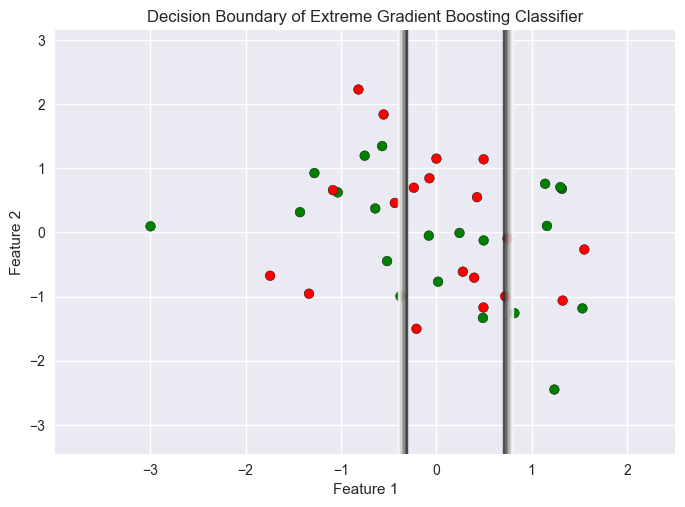

In [144]:
X_train = X
y_train = Y

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

XGBmodel = xgb.XGBClassifier(n_estimators=1, learning_rate=0.5, max_depth = 3)
XGBmodel.fit(X, y_encoded)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = XGBmodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Extreme Gradient Boosting Classifier')
plt.show()

In [145]:
trading_strategy_df['XGboost_pred_labels12'] =  pd.Series(XGB_pred)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [146]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['XGboost_pred_labels12'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['XGboost_pred_labels12'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['XGboost_pred_labels12'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['XGboost_pred_labels12'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['XGboost_pred_labels12'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
ExtremeGradientboost_return = trading_strategy(trading_strategy_df)
ExtremeGradientboost_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 112.78373238780601
shares buyed with the total amount which we earned previously=  0.7622582270215296
Total amount earned after selling the previous bought shares is 113.21059513395608
shares buyed with the total amount which we earned previously=  0.8349479916780511
Total amount earned after selling the previous bought shares is 115.89078379297256
shares buyed with the total amount which we earned previously=  0.8604260278589582
Total amount earned after selling the previous bought shares is 118.60973319198109
shares buyed with the total amount which we earned previously=  0.8150751079549514
Total amount earned after selling the previous bought shares is 119.25363705495948
shares buyed with the total amount which we earned previously=  0.760740247727931
Total amount earned after selling the previous bought shares is 117.92234162143559
shares buyed with the total amount

118.38

# Applying SVM 
# 1) LINEAR

In [147]:
svm_classifier = svm.SVC(kernel='linear').fit(X,Y)
SVM_lnr_predicted = svm_classifier.predict(x_test)
svm_lnr_accuracy = accuracy_score(y_truu, SVM_lnr_predicted)
print(SVM_lnr_predicted)
print("Accuracy of Linear Support Vector Machine clf:", svm_lnr_accuracy*100 )

['green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green']
Accuracy of Linear Support Vector Machine clf: 56.60377358490566


In [148]:
cm_svm_lnr = confusion_matrix(y_truu, SVM_lnr_predicted)
print(cm_svm_lnr)

[[30  0]
 [23  0]]


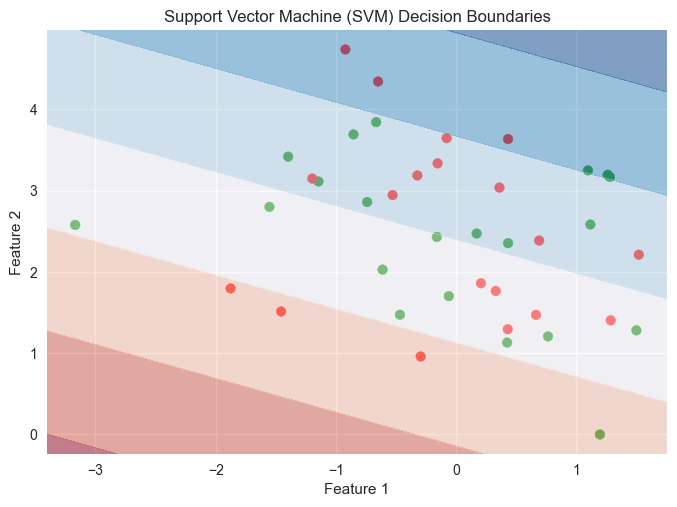

In [149]:
plt.scatter(df_2018['mean_return'], df_2018['volatility'], c=df_2018['labels'], cmap='bwr')
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#plt.contour(xx, yy, Z, levels=[0], colors='red', linestyles=['-'], linewidths=[2])

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5, linestyles=['--', '-', '--'])   


plt.title('Support Vector Machine (SVM) Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 2) Gaussian SVM 

In [150]:
svmg_classifier = svm.SVC(kernel ='rbf',gamma=0.15)
svmg_classifier.fit(X,Y)

svm_classifierG_pred = svmg_classifier.predict(x_test)
print(svm_classifierG_pred)
GSVM_acc = accuracy_score(y_truu, svm_classifierG_pred)
print("Accuracy of SVM Gaussian: ",GSVM_acc*100) 

['green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green']
Accuracy of SVM Gaussian:  56.60377358490566


In [151]:
cm_Gaussian_svm = confusion_matrix(y_truu, svm_classifierG_pred)
print(cm_Gaussian_svm)

[[30  0]
 [23  0]]


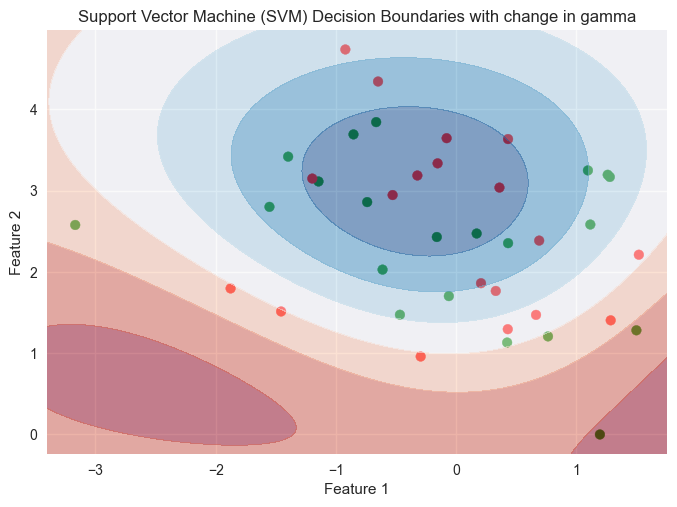

In [152]:
plt.scatter(df_2018['mean_return'], df_2018['volatility'], c=df_2018['labels'], cmap='bwr')
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Zg = svmg_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Zg = Zg.reshape(xx.shape)
plt.contourf(xx, yy, Zg, cmap=plt.cm.RdBu, alpha=0.5) 
plt.title('Support Vector Machine (SVM) Decision Boundaries with change in gamma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 3) Polynomial SVM with degree 5

In [153]:
poly_svm_clf = svm.SVC(kernel ='poly', degree = 5)
poly_svm_clf.fit(X,Y)

poly_svm_pred = poly_svm_clf.predict(x_test)
poly_svm_acc = accuracy_score(y_truu, poly_svm_pred)
print("Accuracy of SVM polynomial with degree 2:",poly_svm_acc*100) 
print(poly_svm_pred)

Accuracy of SVM polynomial with degree 2: 56.60377358490566
['green' 'green' 'red' 'green' 'green' 'green' 'red' 'green' 'red' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'red' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green']


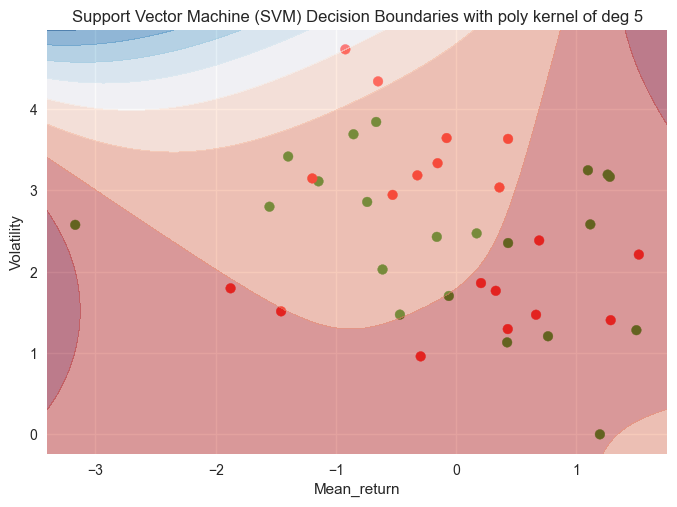

In [154]:
plt.scatter(df_2018['mean_return'], df_2018['volatility'], c=df_2018['labels'], cmap='bwr')
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Zp = poly_svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Zp = Zp.reshape(xx.shape)
plt.contourf(xx, yy, Zp, cmap=plt.cm.RdBu, alpha=0.5)  

plt.title('Support Vector Machine (SVM) Decision Boundaries with poly kernel of deg 5')
plt.xlabel('Mean_return')
plt.ylabel('Volatility')
plt.show()

In [155]:
cm_poly_svm = confusion_matrix(y_truu, poly_svm_pred)
print(cm_poly_svm)

[[28  2]
 [21  2]]


In [156]:
TN_polysvm = cm_poly_svm[0][0]
FP_polysvm = cm_poly_svm[0][1]
FN_polysvm = cm_poly_svm[1][0]
TP_polysvm = cm_poly_svm[1][1]
TPR_polysvm = TP_polysvm/(TP_polysvm + FN_polysvm)
print("True positive rate of poly SVM:",round(TPR_polysvm,2))
TNR_polysvm = TN_polysvm/(TN_polysvm + FP_polysvm)
print("True negative rate of poly SVM:",round(TNR_polysvm,2))

True positive rate of poly SVM: 0.09
True negative rate of poly SVM: 0.93


In [157]:
trading_strategy_df['Poly_svm_pred'] =  pd.Series(poly_svm_pred)
trading_strategy_df['labels13'] = trading_strategy_df['Poly_svm_pred'].apply(lambda x: 1 if x == 'green' else 0)
trading_strategy_df

Open   High    Low  Close  Adj Close   Volume  Return        Date  \
0  112.06 121.47 111.50 118.51     118.51  2484800    8.71  2019-01-04   
1  123.00 124.36 118.29 120.52     120.52  1414400   -2.75  2019-01-11   
2  135.00 136.00 132.58 133.66     133.66  1314100    0.31  2019-01-18   
3  134.28 135.65 133.00 134.67     134.67   997000    1.49  2019-01-25   
4  135.12 138.79 133.45 137.21     137.21  1783500    1.30  2019-02-01   
5  129.52 135.74 128.97 134.71     134.71  1989900    2.68  2019-02-08   
6  147.96 148.64 144.69 148.52     148.52  2056100    1.12  2019-02-15   
7  149.00 152.57 148.80 151.19     151.19  1961400    1.80  2019-02-22   
8  139.21 141.00 135.22 138.00     138.00  3306200   -1.53  2019-03-01   
9  138.39 141.25 138.10 140.18     140.18  1129100    0.00  2019-03-08   
10 141.61 144.47 140.60 141.91     141.91  1346500    1.19  2019-03-15   
11 142.75 142.85 137.03 139.00     139.00  2242700   -3.47  2019-03-22   
12 135.59 139.71 135.10 138.80     138.80  1666100    0.84  2019-03-29   
13 141.44 144.25 140.91 141.13     141.13  2196600    0.61  2019-04-05   
14 142.71 146.20 142.26 144.95     144.95   904700    2.22  2019-04-12   
15 137.46 139.75 134.66 139.65     139.65  1119200    1.42  2019-04-18   
16 134.00 139.23 133.23 138.25     138.25  2844600    4.09  2019-04-26   
17 132.77 137.24 132.77 136.17     136.17  1411300    2.62  2019-05-03   
18 134.69 138.18 134.34 137.85     137.85  1296800    2.24  2019-05-10   
19 133.73 135.00 131.99 132.76     132.76   991300   -1.97  2019-05-17   
20 122.90 125.57 122.32 124.65     124.65  1227800    2.52  2019-05-24   
21 125.44 127.27 124.81 125.58     125.58  1073300   -1.59  2019-05-31   
22 135.50 140.63 135.04 140.08     140.08  1643500    3.45  2019-06-07   
23 144.00 145.00 141.50 144.59     144.59  1109400   -0.18  2019-06-14   
24 148.78 149.34 147.23 148.31     148.31  2648000   -0.97  2019-06-21   
25 143.74 146.22 142.68 146.22     146.22  9156200    2.07  2019-06-28   
26 145.52 146.43 144.65 146.31     146.31   679600    0.31  2019-07-05   
27 151.00 153.30 150.48 152.30     152.30   952000    0.56  2019-07-12   
28 145.70 146.24 143.61 144.11     144.11   907000   -0.75  2019-07-19   
29 153.44 156.55 153.35 155.38     155.38   896600    1.57  2019-07-26   
30 154.35 156.58 151.01 153.47     153.47   953900   -1.38  2019-08-02   
31 156.76 157.50 154.50 155.01     155.01   466700   -1.68  2019-08-09   
32 146.63 148.73 146.43 147.74     147.74   641300    1.63  2019-08-16   
33 140.00 140.12 135.26 138.02     138.02  1485800   -2.08  2019-08-23   
34 136.70 138.24 133.00 134.95     134.95   678900   -1.03  2019-08-30   
35 135.53 136.69 134.72 136.06     136.06   937100    0.28  2019-09-06   
36 129.00 131.80 127.75 130.63     130.63  1221800    1.62  2019-09-13   
37 124.00 125.87 120.63 120.70     120.70  2380400   -2.97  2019-09-20   
38 116.74 117.23 111.30 112.24     112.24  1837200   -3.41  2019-09-27   
39 116.10 117.17 113.89 116.42     116.42  2040500    1.39  2019-10-04   
40 115.00 118.11 114.83 115.49     115.49  1353500    2.64  2019-10-11   
41 117.91 117.97 114.26 115.33     115.33   802600   -2.12  2019-10-18   
42 119.53 122.00 118.32 120.69     120.69  2319700    1.56  2019-10-25   
43 145.00 147.11 143.04 146.92     146.92  1851300    1.82  2019-11-01   
44 147.90 149.33 146.01 147.85     147.85   902800   -0.22  2019-11-08   
45 148.67 148.82 146.71 147.51     147.51   885600   -0.84  2019-11-15   
46 140.08 141.89 139.35 140.89     140.89  1575800    1.32  2019-11-22   
47 142.00 143.23 141.59 142.55     142.55   394500   -0.27  2019-11-29   
48 147.59 148.18 146.34 148.09     148.09   724200    1.03  2019-12-06   
49 146.51 148.36 146.09 147.20     147.20   703300   -0.02  2019-12-13   
50 150.73 150.73 148.80 150.31     150.31   828300    0.42  2019-12-20   
51 152.62 154.00 152.51 153.17     153.17   920700    0.43  2019-12-27   
52 149.12 150.21 147.55 149.55     149.55   769300   -0.17  2019-12-31   

    Week

In [158]:
def trading_strategy(data):
    investment_amount = 100
    amount_return = 0
    shares = 0
    position = 0
    total_amount = 0
    profit = 0
    r = 0
            
            
    for i in data['Week_Number']:
        if i == 0:
            continue
        
        
        if 0 in data['Week_Number'] and i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            print("initially shares bought with $100:",shares)
            position = position + 1
        
        elif i == 1:
            shares = investment_amount / data.iloc[i - 1]['Adj Close']
            #print(shares)
            position = position + 1
        
        
        else:
            if (i >1 and data.iloc[i]['labels13'] == 1 and position == 1):
                shares = shares        # investment_amount / data.iloc[i]['Adj Close']
                #print(shares)
            
            if (i >1 and data.iloc[i]['labels13'] == 1 and position == 1 and i == 52):  ## EXCEPTIONAL CONDITION 
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### SELLING #### Because upcoming week is red
            if (i>1 and data.iloc[i]['labels13'] == 0 and position == 1):
                #investment_amount = shares * data.iloc[i]['Adj Close']
                # profit = investment_amount - investment_amount
                #investment_amount_old = investment_amount
    
                investment_amount = shares * data.iloc[i]['Adj Close']
                position = position - 1
                
                print("Total amount earned after selling the previous bought shares is",investment_amount)
            
            ### BUYING ### Because upcoming week in green
            if (i>1 and data.iloc[i]['labels13'] == 1 and position == 0 and i+1<len(data)):
                shares = investment_amount / data.iloc[i+1]['Open']
                print("shares buyed with the total amount which we earned previously= ",shares)
                position = position + 1
                
            if (i>1 and data.iloc[i]['labels13'] == 0 and position == 0):
                continue
            
    return round(investment_amount,2)
            
poly_svm_return = trading_strategy(trading_strategy_df)
poly_svm_return

initially shares bought with $100: 0.8438106336800777
Total amount earned after selling the previous bought shares is 112.78373238780601
shares buyed with the total amount which we earned previously=  0.8346931354607466
Total amount earned after selling the previous bought shares is 123.9686280448239
shares buyed with the total amount which we earned previously=  0.8905152077151287
Total amount earned after selling the previous bought shares is 122.89109866468776
shares buyed with the total amount which we earned previously=  0.8678137005509238
Total amount earned after selling the previous bought shares is 134.84089702897413
shares buyed with the total amount which we earned previously=  0.860174162758688
Total amount earned after selling the previous bought shares is 128.639048665605


128.64

# Applying K-means Clustering (Unsupervised Learning)

In [159]:
inertia_list = []
for k in range (1, 9):
    kmeans_classifier = KMeans(n_clusters = k, random_state = 43)
    kmeans_classifier.fit(X)
    inertia = kmeans_classifier.inertia_
    inertia_list.append(inertia)
inertia_list

[79.99999999999999,
 43.17845123429825,
 30.87060790014501,
 21.046177649935778,
 16.42417803000595,
 13.692526276900143,
 11.873577151336605,
 9.88463296640563]

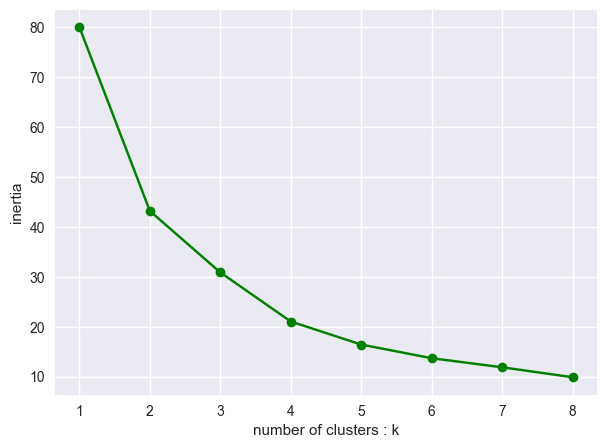

In [160]:
fig, ax = plt.subplots(1,figsize =(7 ,5))
plt.plot(range(1, 9), inertia_list, marker='o', color ='green')
plt.xlabel('number of clusters : k')
plt.ylabel('inertia')
plt.show()

## Choosing optimal K = 4 as the best for 2018 year data. The elbow method involves plotting the inertia values against the number of clusters and looking for the "elbow" point where the rate of decrease in inertia significantly decreases. 

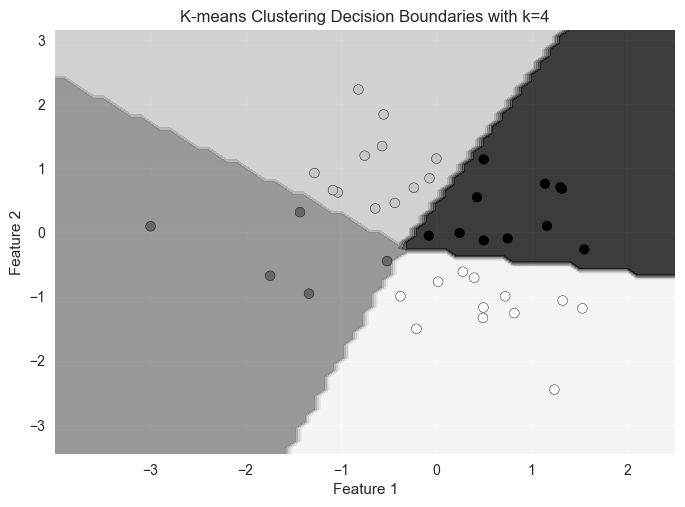

In [161]:
X_train = X
y_train = Y
k = 4

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels_, edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Decision Boundaries with k=4')
plt.show()

In [162]:
kmeans.labels_

array([3, 3, 3, 0, 1, 3, 1, 0, 0, 0, 3, 3, 1, 3, 0, 0, 3, 1, 3, 0, 0, 0,
       2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 3, 0])

# Conclusions

### Some of the other classifiers and their predictions on the test data with their accuracy  

In [163]:
Lazyclf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
modelsLazyclf, predictionsLazyclf = Lazyclf.fit(X, x_test, Y, y_truu)

modelsLazyclf

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.30it/s]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.60               0.56    None      0.56   
BernoulliNB                        0.60               0.56    None      0.56   
Perceptron                         0.53               0.53    None      0.53   
PassiveAggressiveClassifier        0.51               0.51    None      0.51   
DummyClassifier                    0.57               0.50    None      0.41   
CalibratedClassifierCV             0.53               0.49    None      0.49   
QuadraticDiscriminantAnalysis      0.49               0.48    None      0.49   
GaussianNB                         0.47               0.48    None      0.47   
NearestCentroid                    0.47               0.47    None      0.47   
SGDClassifier                      0.53               0.47    None      0.39   
SVC                                0.47               0.42    None      0.36   
RidgeClassifierCV                  0.47               0.42    None      0.36   
LogisticRegression                 0.42               0.37    None      0.33   
RidgeClassifier                    0.42               0.37    None      0.33   
LinearSVC                          0.42               0.37    None      0.33   
LinearDiscriminantAnalysis         0.42               0.37    None      0.33   
KNeighborsClassifier               0.38               0.36    None      0.38   
BaggingClassifier                  0.38               0.36    None      0.37   
NuSVC                              0.38               0.36    None      0.37   
LabelPropagation                   0.36               0.35    None      0.36   
RandomForestClassifier             0.36               0.34    None      0.35   
LabelSpreading                     0.34               0.33    None      0.34   
ExtraTreesClassifier               0.34               0.33    None      0.34   
ExtraTreeClassifier                0.34               0.33    None      0.34   
AdaBoostClassifier                 0.32               0.31    None      0.32   
DecisionTreeClassifier             0.32               0.30    None      0.31   

                               Time Taken  
Model                                      
LGBMClassifier                       0.05  
BernoulliNB                          0.01  
Perceptron                           0.01  
PassiveAggressiveClassifier          0.01  
DummyClassifier                      0.01  
CalibratedClassifierCV               0.03  
QuadraticDiscriminantAnalysis        0.01  
GaussianNB                           0.01  
NearestCentroid                      0.01  
SGDClassifier                        0.01  
SVC                                  0.01  
RidgeClassifierCV                    0.01  
LogisticRegression                   0.01  
RidgeClassifier                      0.02  
LinearSVC                            0.01  
LinearDiscriminantAnalysis           0.01  
KNeighborsClassifier                 0.01  
BaggingClassifier                    0.03  
NuSVC                                0.01  
LabelPropagation                     0.01  
RandomForestClassifier               0.14  
LabelSpreading                       0.01  
ExtraTreesClassifier                 0.13  
ExtraTreeClassifier                  0.01  
AdaBoostClassifier                   0.13  
DecisionTreeClassifier               0.01

### So LGBM (Light Gradient Boosting Machine) and Bernouli NB (Naive Bayesian) classifier performed well with this data they acheived a higher accuracy compared to other models which we trained above

## Summarizing all the results of our model

In [164]:
fill = 0
summarize = {
    'Models_Build': ['Logistic_Regression', 'Knn_k=3', 'Gaussian_Naive_Bayesian', 'Student_t_GNB', 'Linear_Discriminant_Analysis(LDA)', 'Quadratic_Discriminant_Analysis(QDA)', 'Decision_Tree', 'Random_Forest', 'AdaBoost', 'Gradient_Boosting', 'Extreme_Gradient_Boosting', 'Linear_SVM', 'G_SVM', 'Poly_SVM'],
    'Accuracies': [logit_accuracy, accuracy_knn, nb_acc, t_nb_accuracy, accuracy_lda, accuracy_qda, accuracy_decisiontree, optimal_forest_acc, ada_accuracy, gb_accuracy, xgb_accuracy, svm_lnr_accuracy, GSVM_acc, poly_svm_acc],
    'Returns_in_$': [logit_return, knn_return, GNB_return, Student_t_GNB_return, LDA_return, QDA_return, DecisionTree_return, RandomForest_return, Adaboost_return, Gradientboost_return, ExtremeGradientboost_return, fill, fill,  poly_svm_return]}

In [165]:
results = pd.DataFrame(summarize)

def format(x):
        return "${:.2f}".format(x)
results['Returns_in_$']  = results['Returns_in_$'].apply(format)

results

Models_Build  Accuracies Returns_in_$
0                    Logistic_Regression        0.42      $123.06
1                                Knn_k=3        0.32      $117.13
2                Gaussian_Naive_Bayesian        0.47      $121.43
3                          Student_t_GNB        0.58      $128.61
4      Linear_Discriminant_Analysis(LDA)        0.42      $123.06
5   Quadratic_Discriminant_Analysis(QDA)        0.49      $116.93
6                          Decision_Tree        0.43       $90.56
7                          Random_Forest        0.53      $124.71
8                               AdaBoost        0.51       $87.78
9                      Gradient_Boosting        0.45      $117.02
10             Extreme_Gradient_Boosting        0.51      $118.38
11                            Linear_SVM        0.57        $0.00
12                                 G_SVM        0.57        $0.00
13                              Poly_SVM        0.57      $128.64

In [166]:
buy_and_hold(df_detailed,2019)

129.99826309247928

# As we can see from the result table above the Student_t_GNB achieved highest accuracy among other models which I trained above. It gave us maximum returns of $ 128.61 if we trade on the labels predicted by student_t_GNB classifier. However Classifiers like SVM did also achieved highest accuracy and were able to give equivalent returns   

# As we can see from the results above the labelling based strategy perform equivalent to buy&hold trading strategy for some models prediction and seems like buy&hold strategy returned more compared to labelling based strategy

# The only highest amount return we could achieve only if we trade on the actual 2019 labels which we got $171


# So to summarise, in this project we saw Price forecasting of stock data, we did indepth analysis of stock trends and wrote Trading strategies as well and build Machine Learning model to analyse the opportunity of investment and it's risk